---
title: "21-复杂与精准绘图"
subtitle: "Complexly and Precisely Plot"
author: "Simon Zhou"
date: "2025-05-10"
format: 
    html:
        code-fold: false
        fig_caption: true
        number-sections: true
        toc: true
        toc-depth: 2
---

In [2]:
import stata_setup
stata_setup.config('C:/Program Files/Stata18', 'mp', splash=False)

## 指定路径

In [4]:
%%stata
clear all
pwd
cd "C:\Users\asus\Desktop\test\Stata-test"
dir


. clear all

. pwd
c:\Users\asus\Desktop\R\quarto\Med-Stat-Notes\Guide\Stata

. cd "C:\Users\asus\Desktop\test\Stata-test"
C:\Users\asus\Desktop\test\Stata-test

. dir
  <dir>   5/10/25 18:51  .                 
  <dir>   5/10/25 18:51  ..                
  84.9k   5/10/25 18:48  Graph_test.pdf    
 206.4k   5/10/25 18:51  Graph_test.png    
   5.7k   5/05/25 12:23  Statatest.smcl    

. 


## 导入数据

依旧使用 auto.dta 数据集

In [7]:
%%stata
sysuse auto.dta,clear

(1978 automobile data)


## 数据初步观测

In [8]:
%%stata
describe


Contains data from C:\Program Files\Stata18/ado\base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2022 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length          int     %8.0g                 Length

## 选择y和x
使用 auto 数据集中的 weight 和 length 作为 y 变量和 x 变量，使用 foreign 作为分类变量

首先画一个简单的散点图

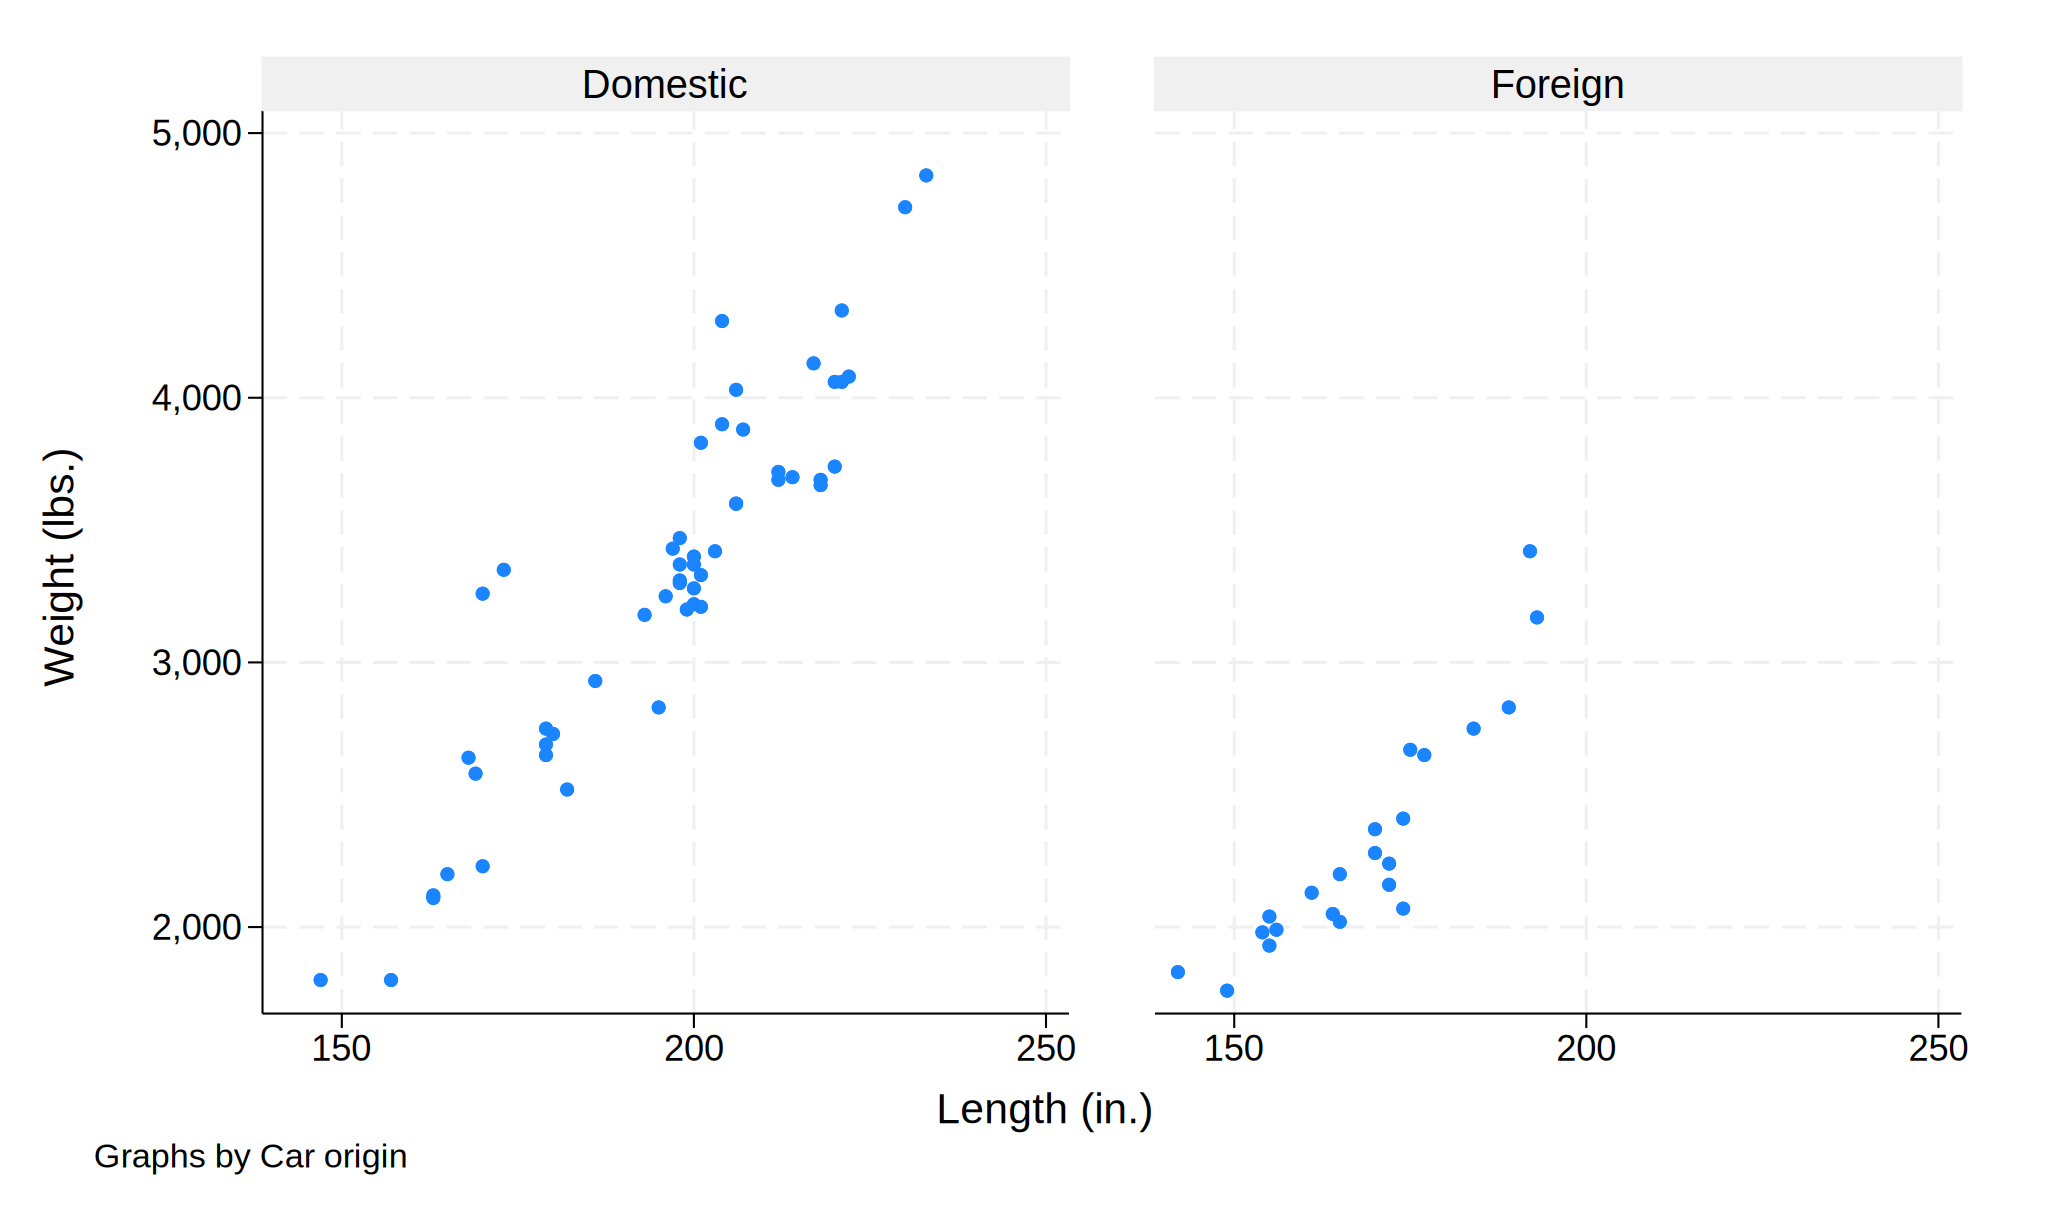

In [9]:
%%stata
twoway scatter weight length,by(foreign)

### 子图合一

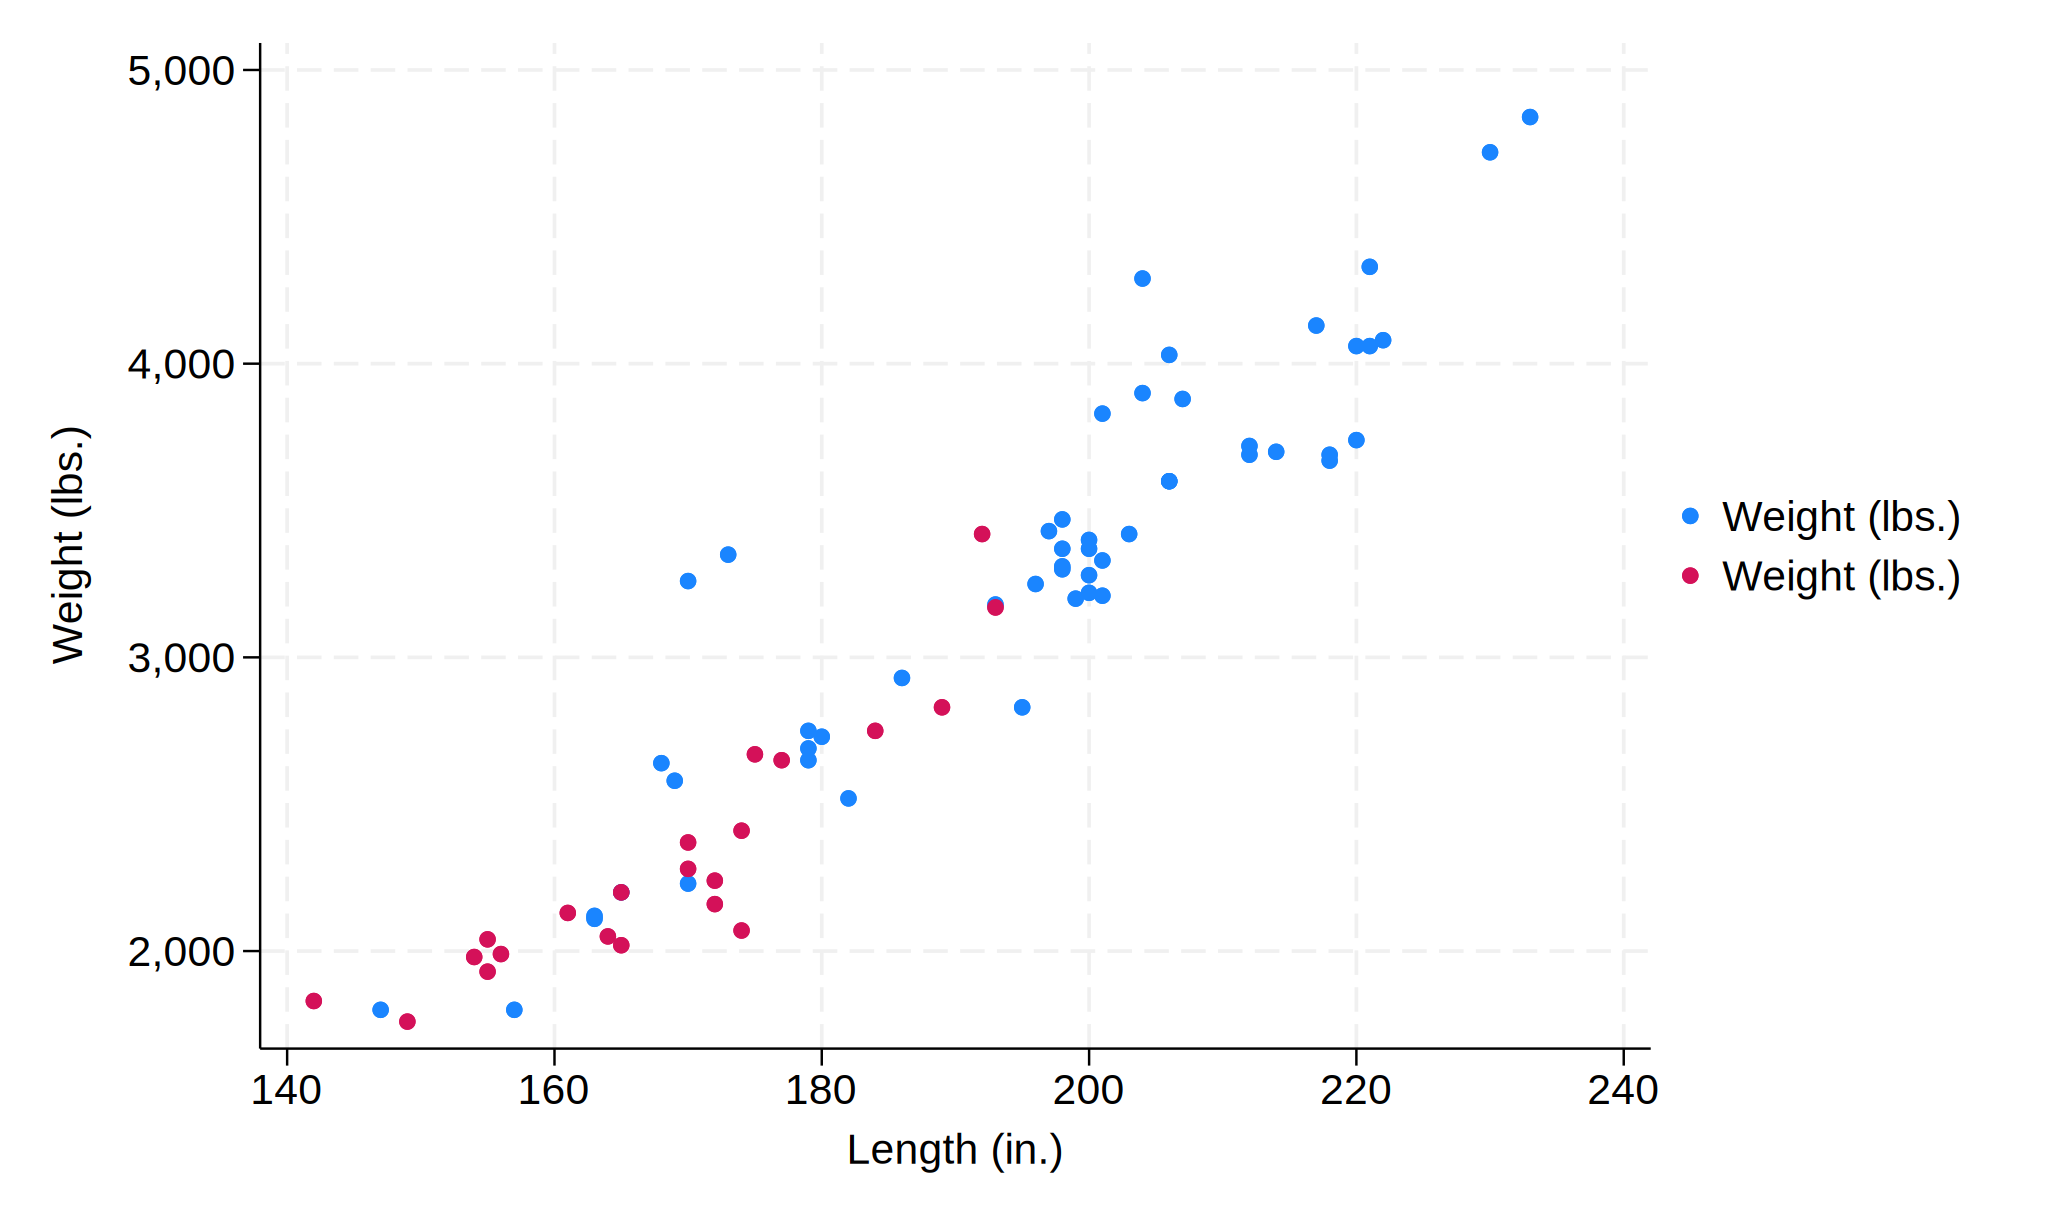

In [11]:
%%stata
twoway(scatter weight length if foreign ==0)(scatter weight length if foreign ==1)

### 数据点抖动

`jitter(#)` 中的数字控制抖动的幅度，值越大，抖动越明显


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink))



. 


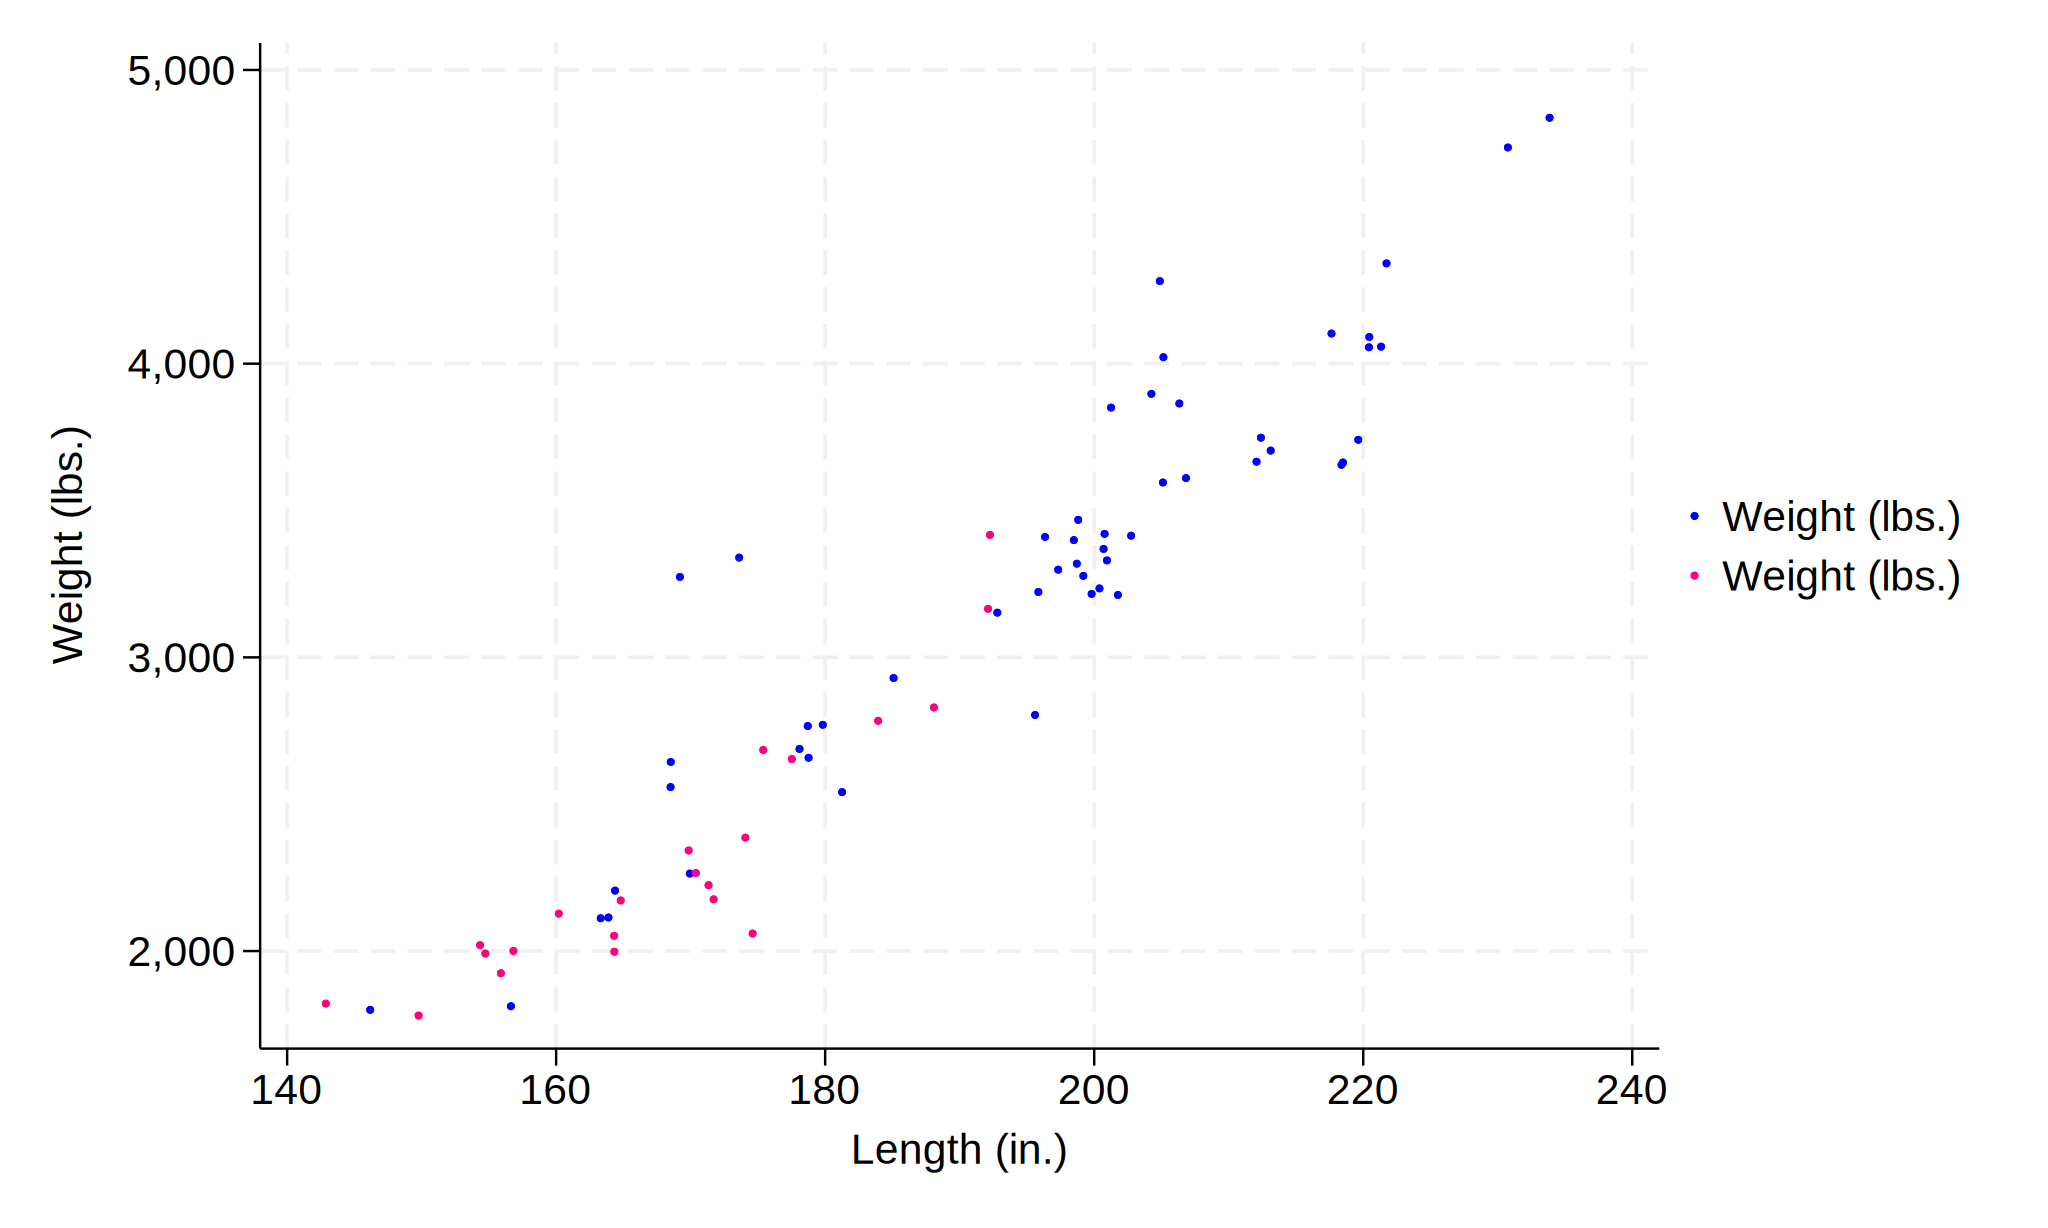

In [13]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink))

### 绘制线性拟合线

使用 `lfit` 命令


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfit weight length if foreign ==0,lcolor(blue)) ///
> (lfit weight length if foreign ==1,lcolor(pink))

. 


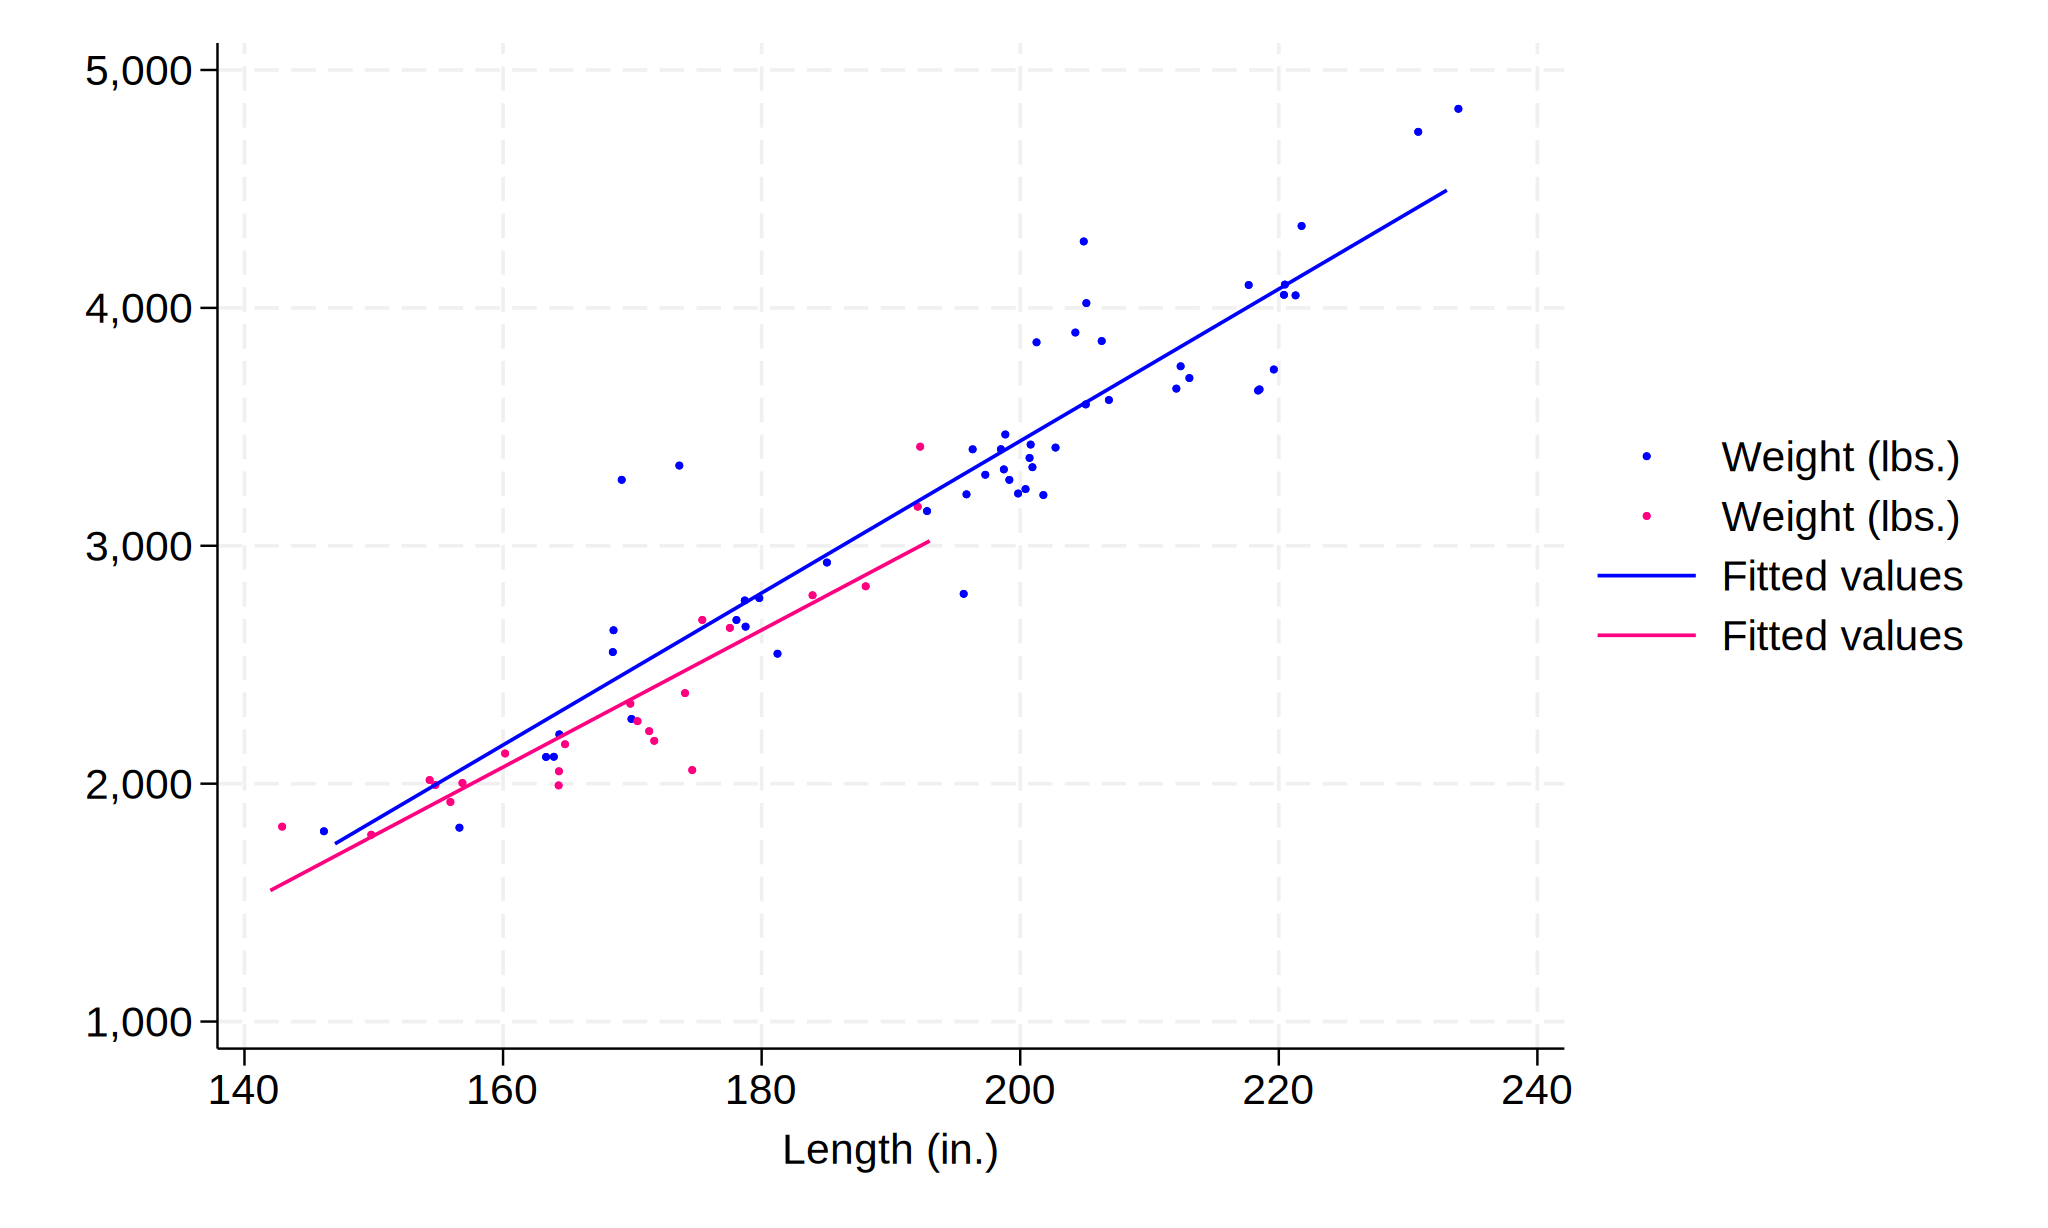

In [14]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfit weight length if foreign ==0,lcolor(blue)) ///
(lfit weight length if foreign ==1,lcolor(pink))

### 给拟合线添加置信区间

使用 `lfitci` 命令


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,lcolor(blue)) ///
> (lfitci weight length if foreign ==1,lcolor(pink))

. 


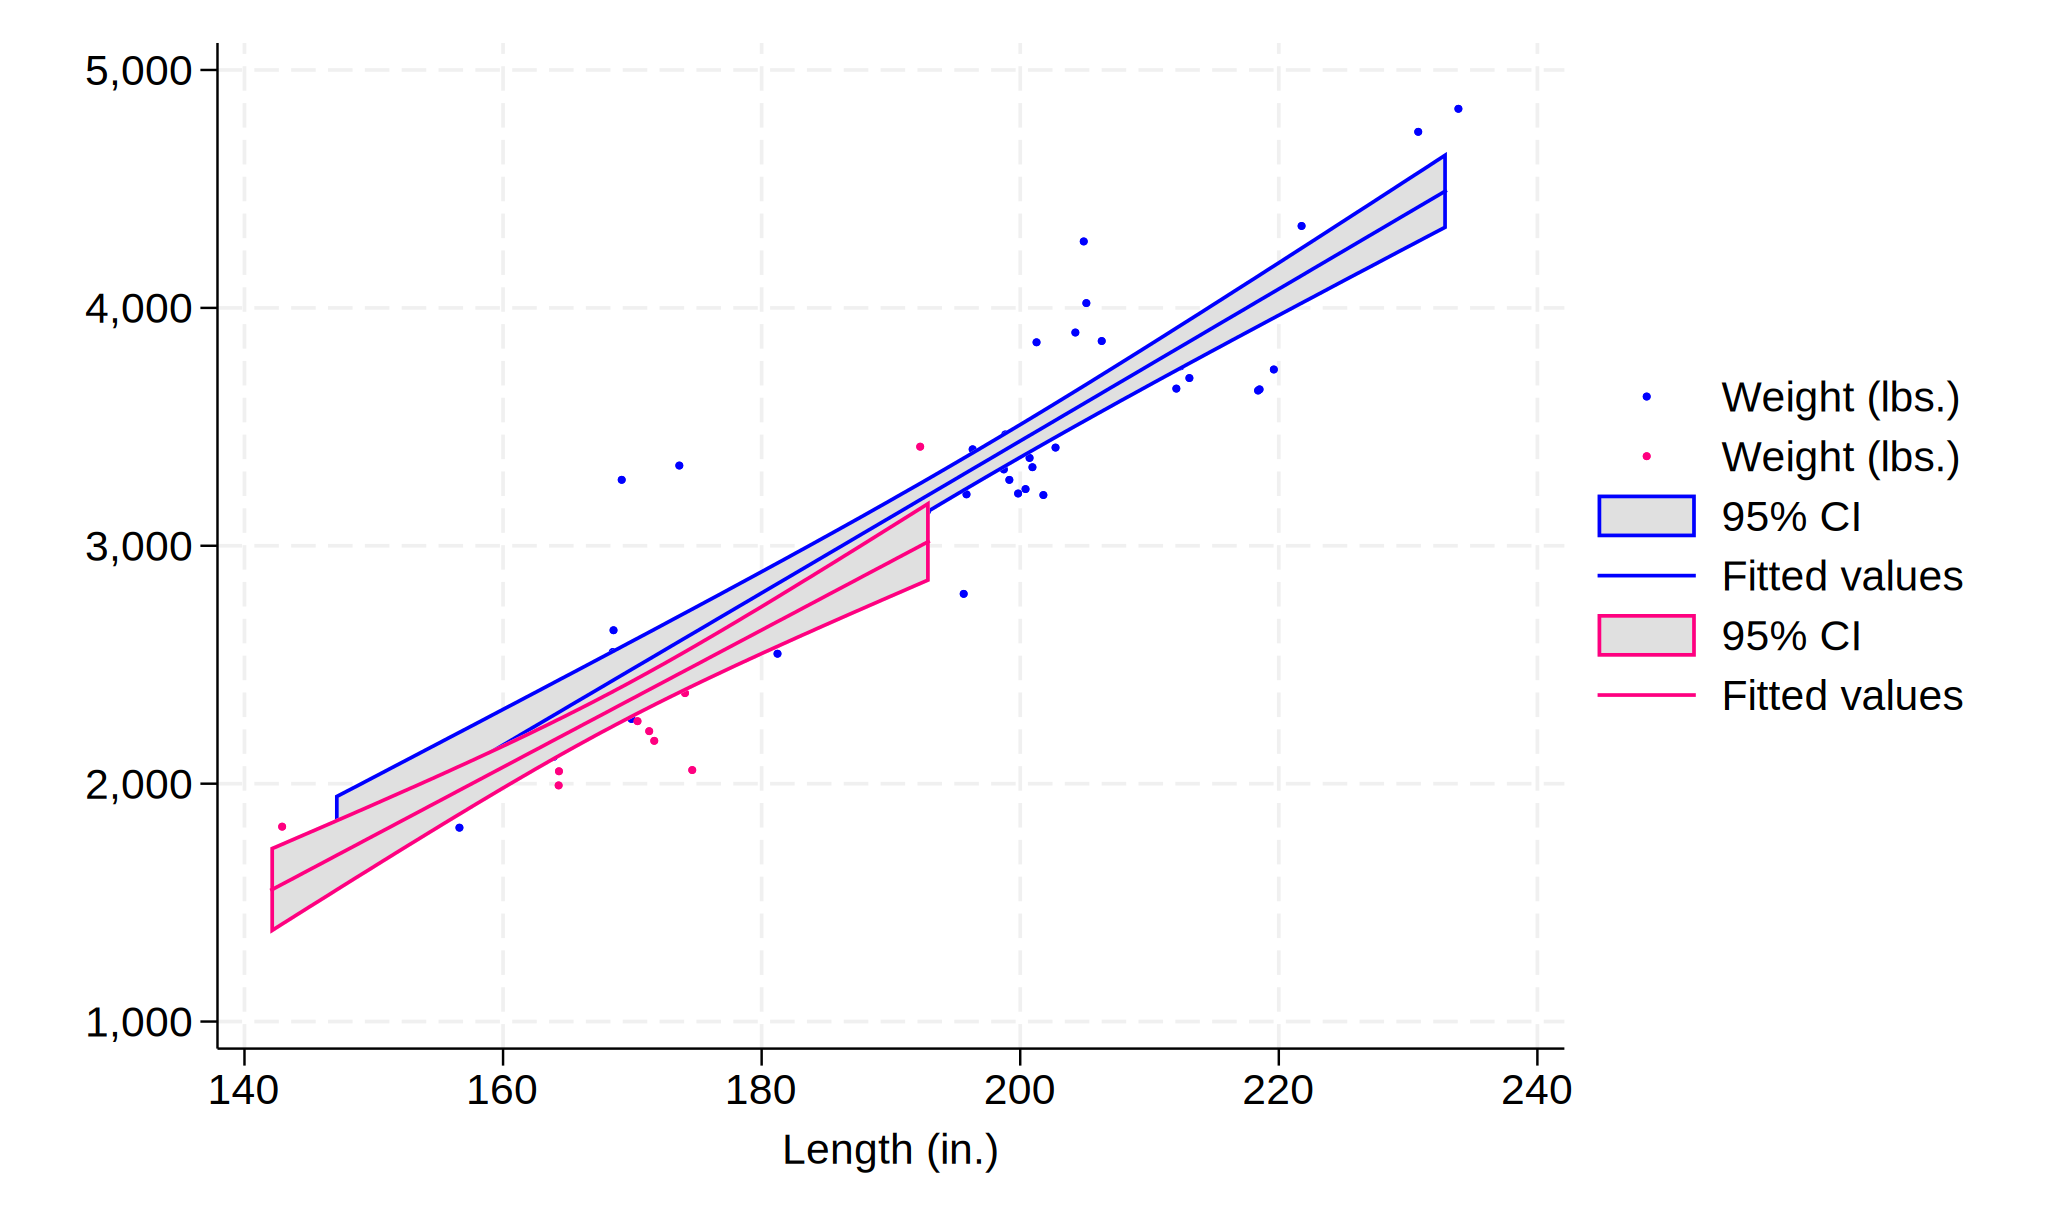

In [15]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,lcolor(blue)) ///
(lfitci weight length if foreign ==1,lcolor(pink))

### 修改 CI style


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick))



. 


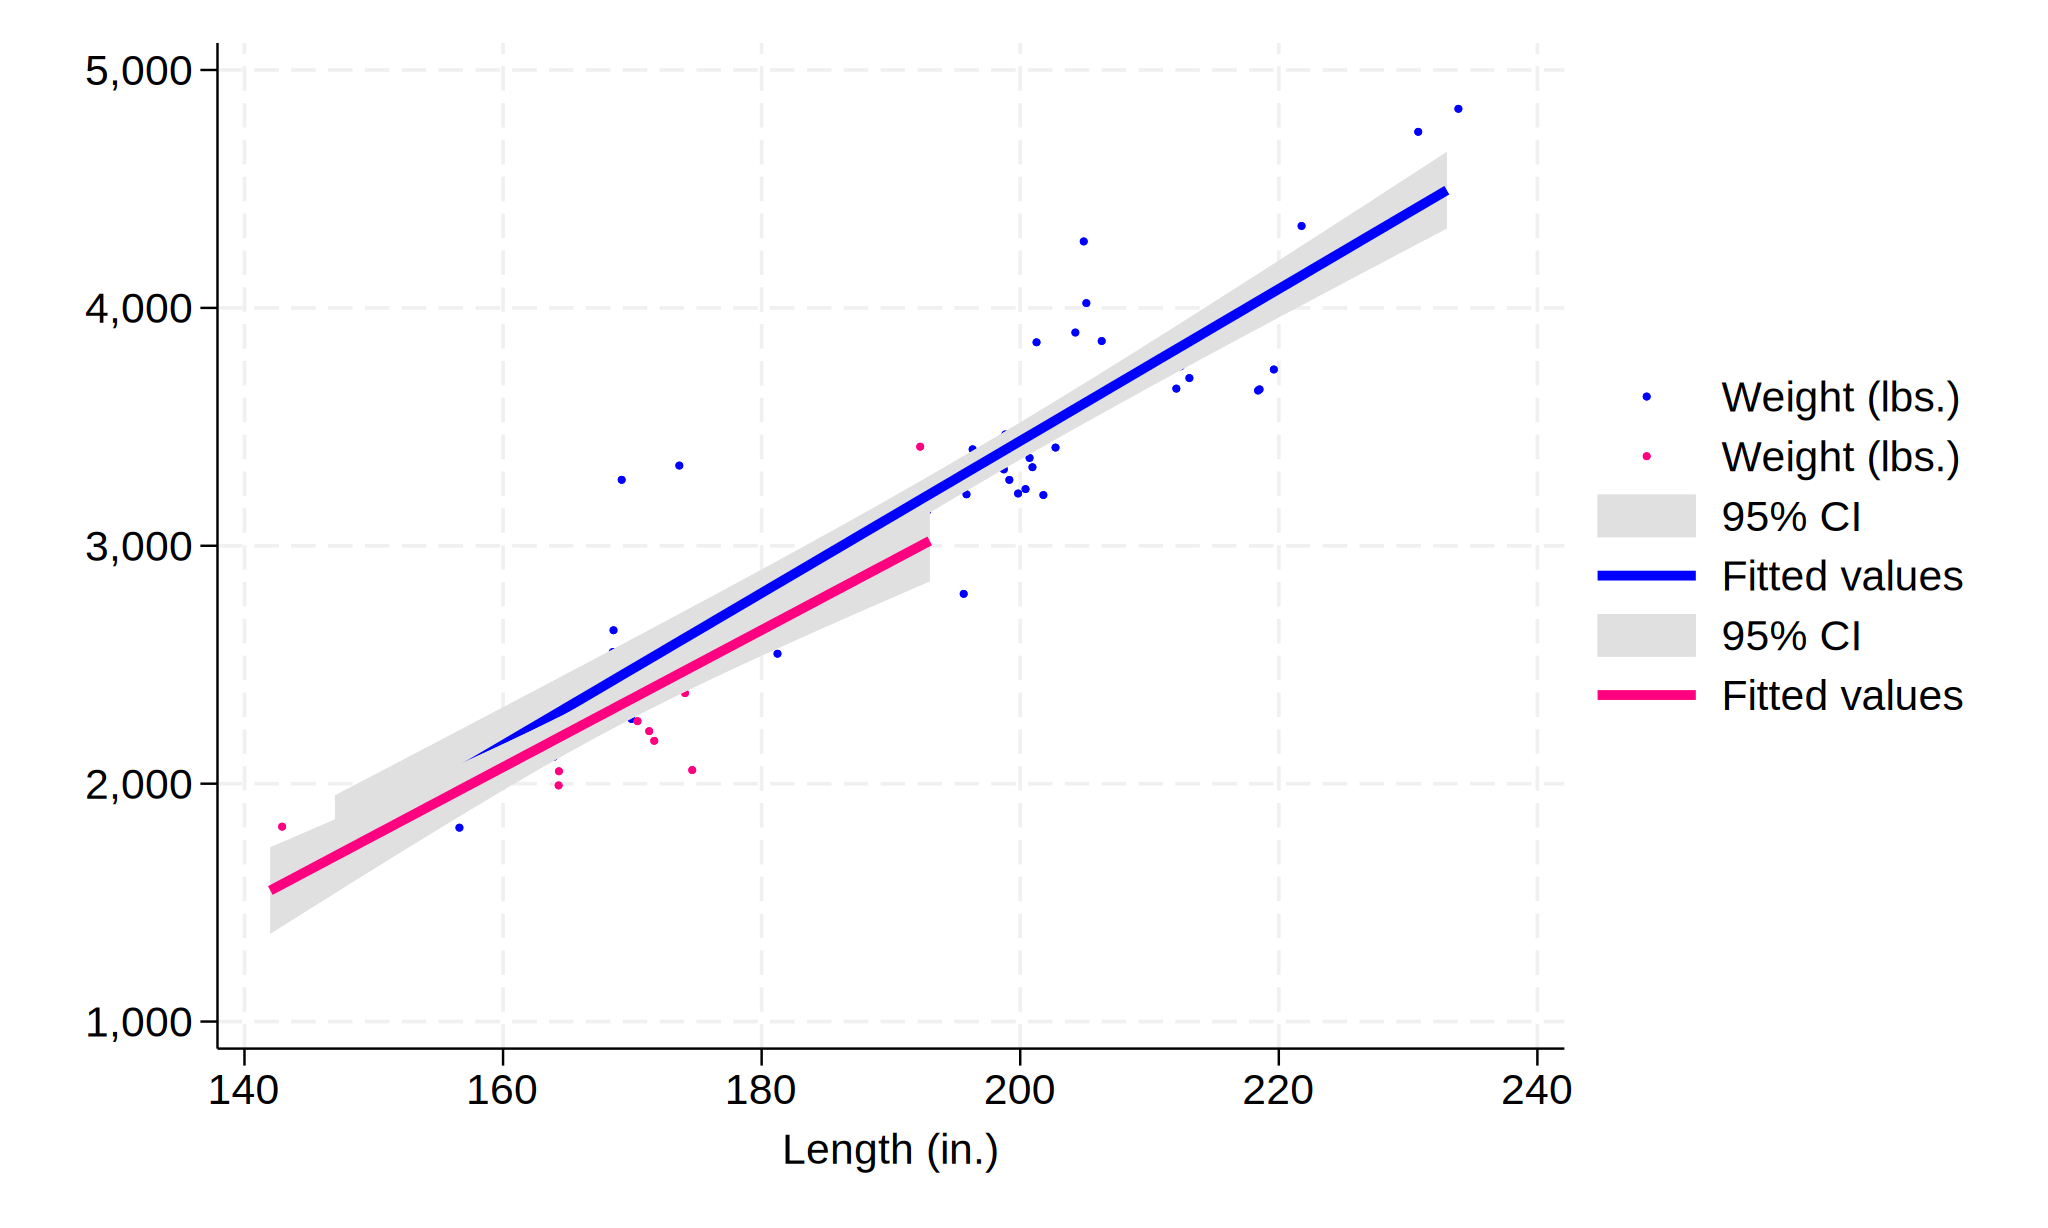

In [17]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick))

### 添加 x 和 y 的标签


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length")

. 


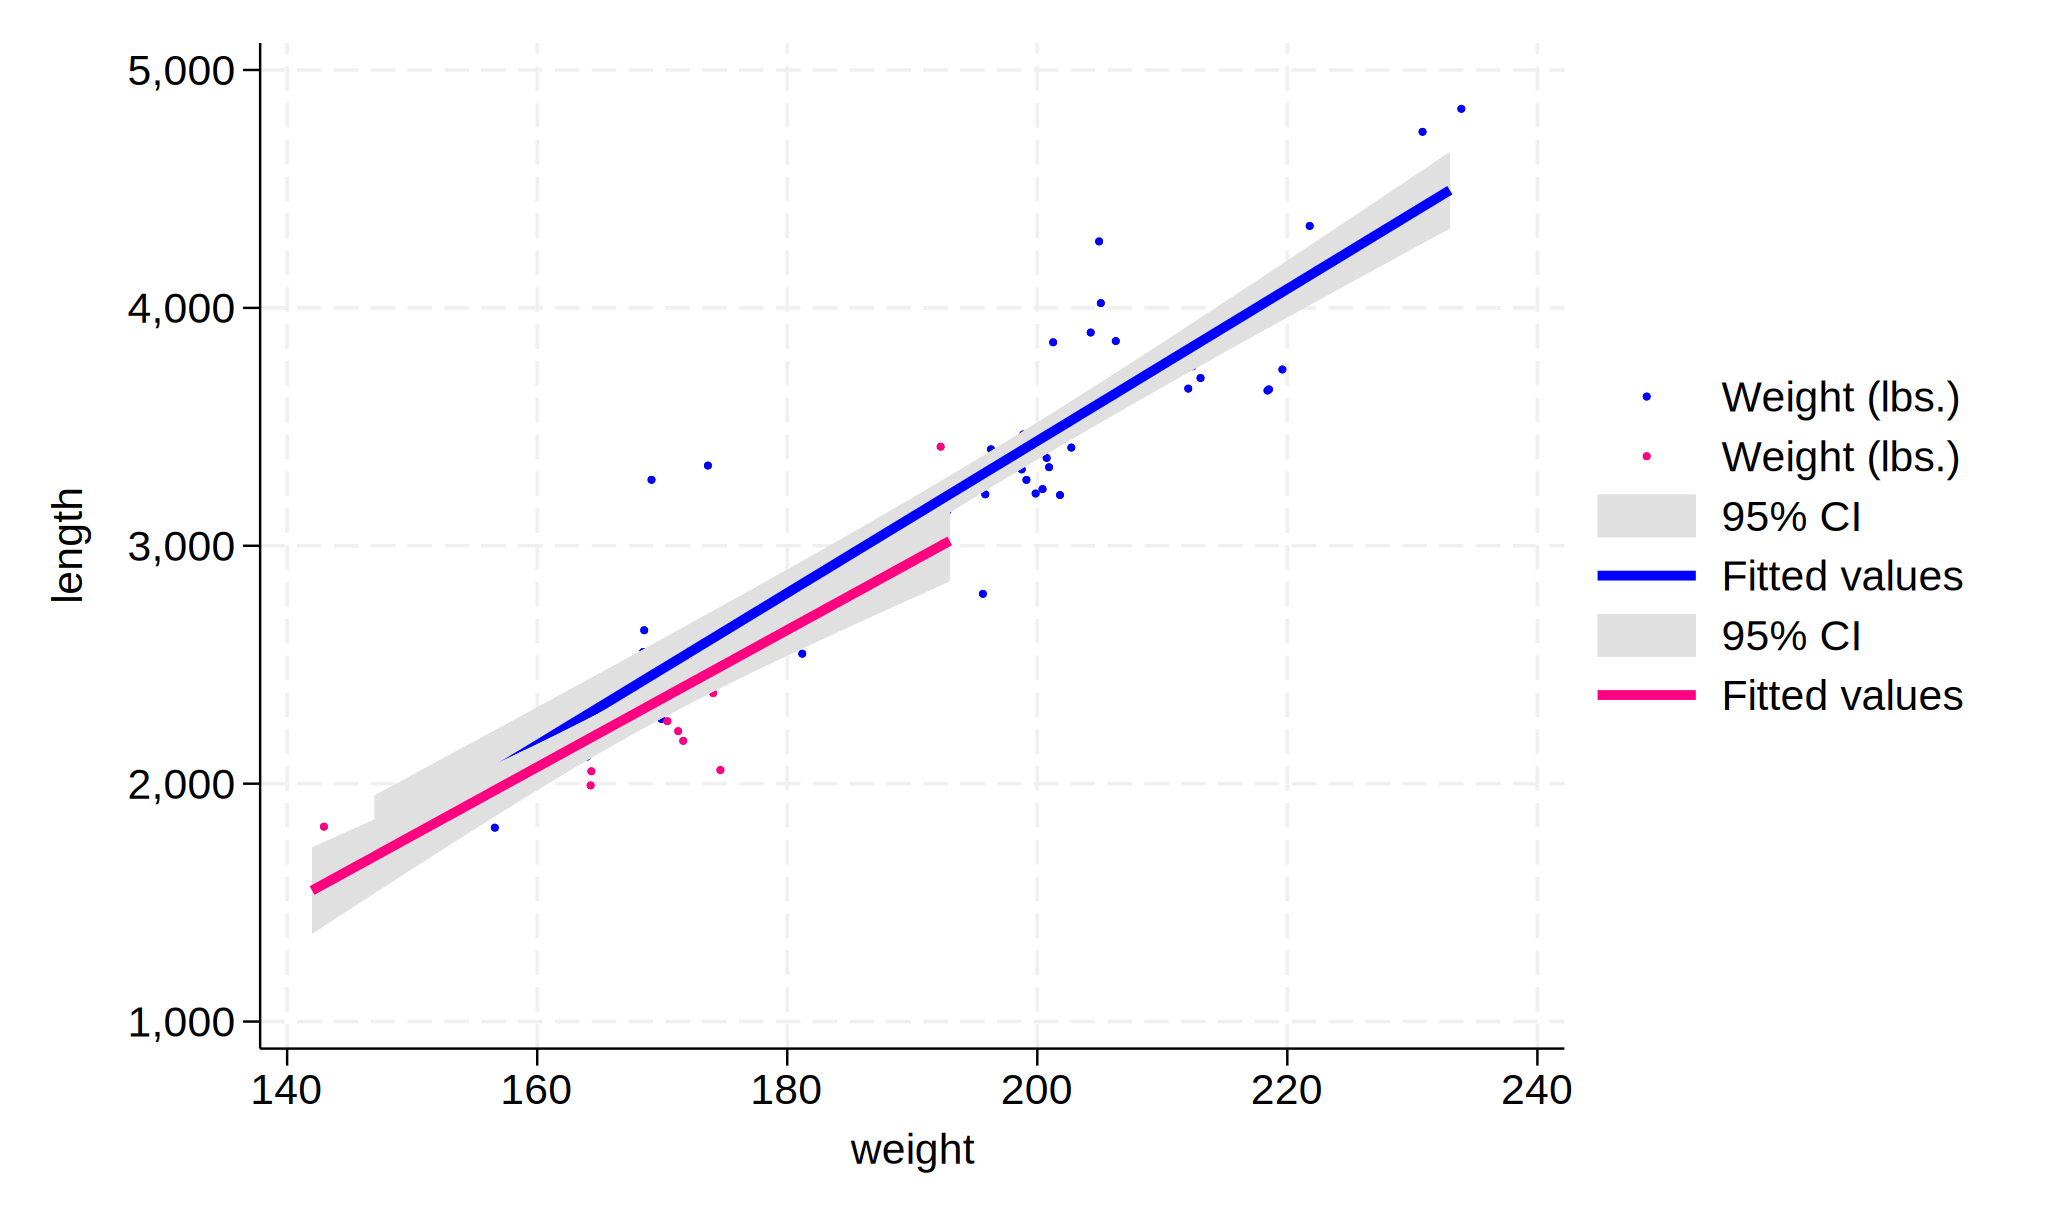

In [18]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length")

### 改变 x 和 y 的范围（range）


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(500)5000)

. 


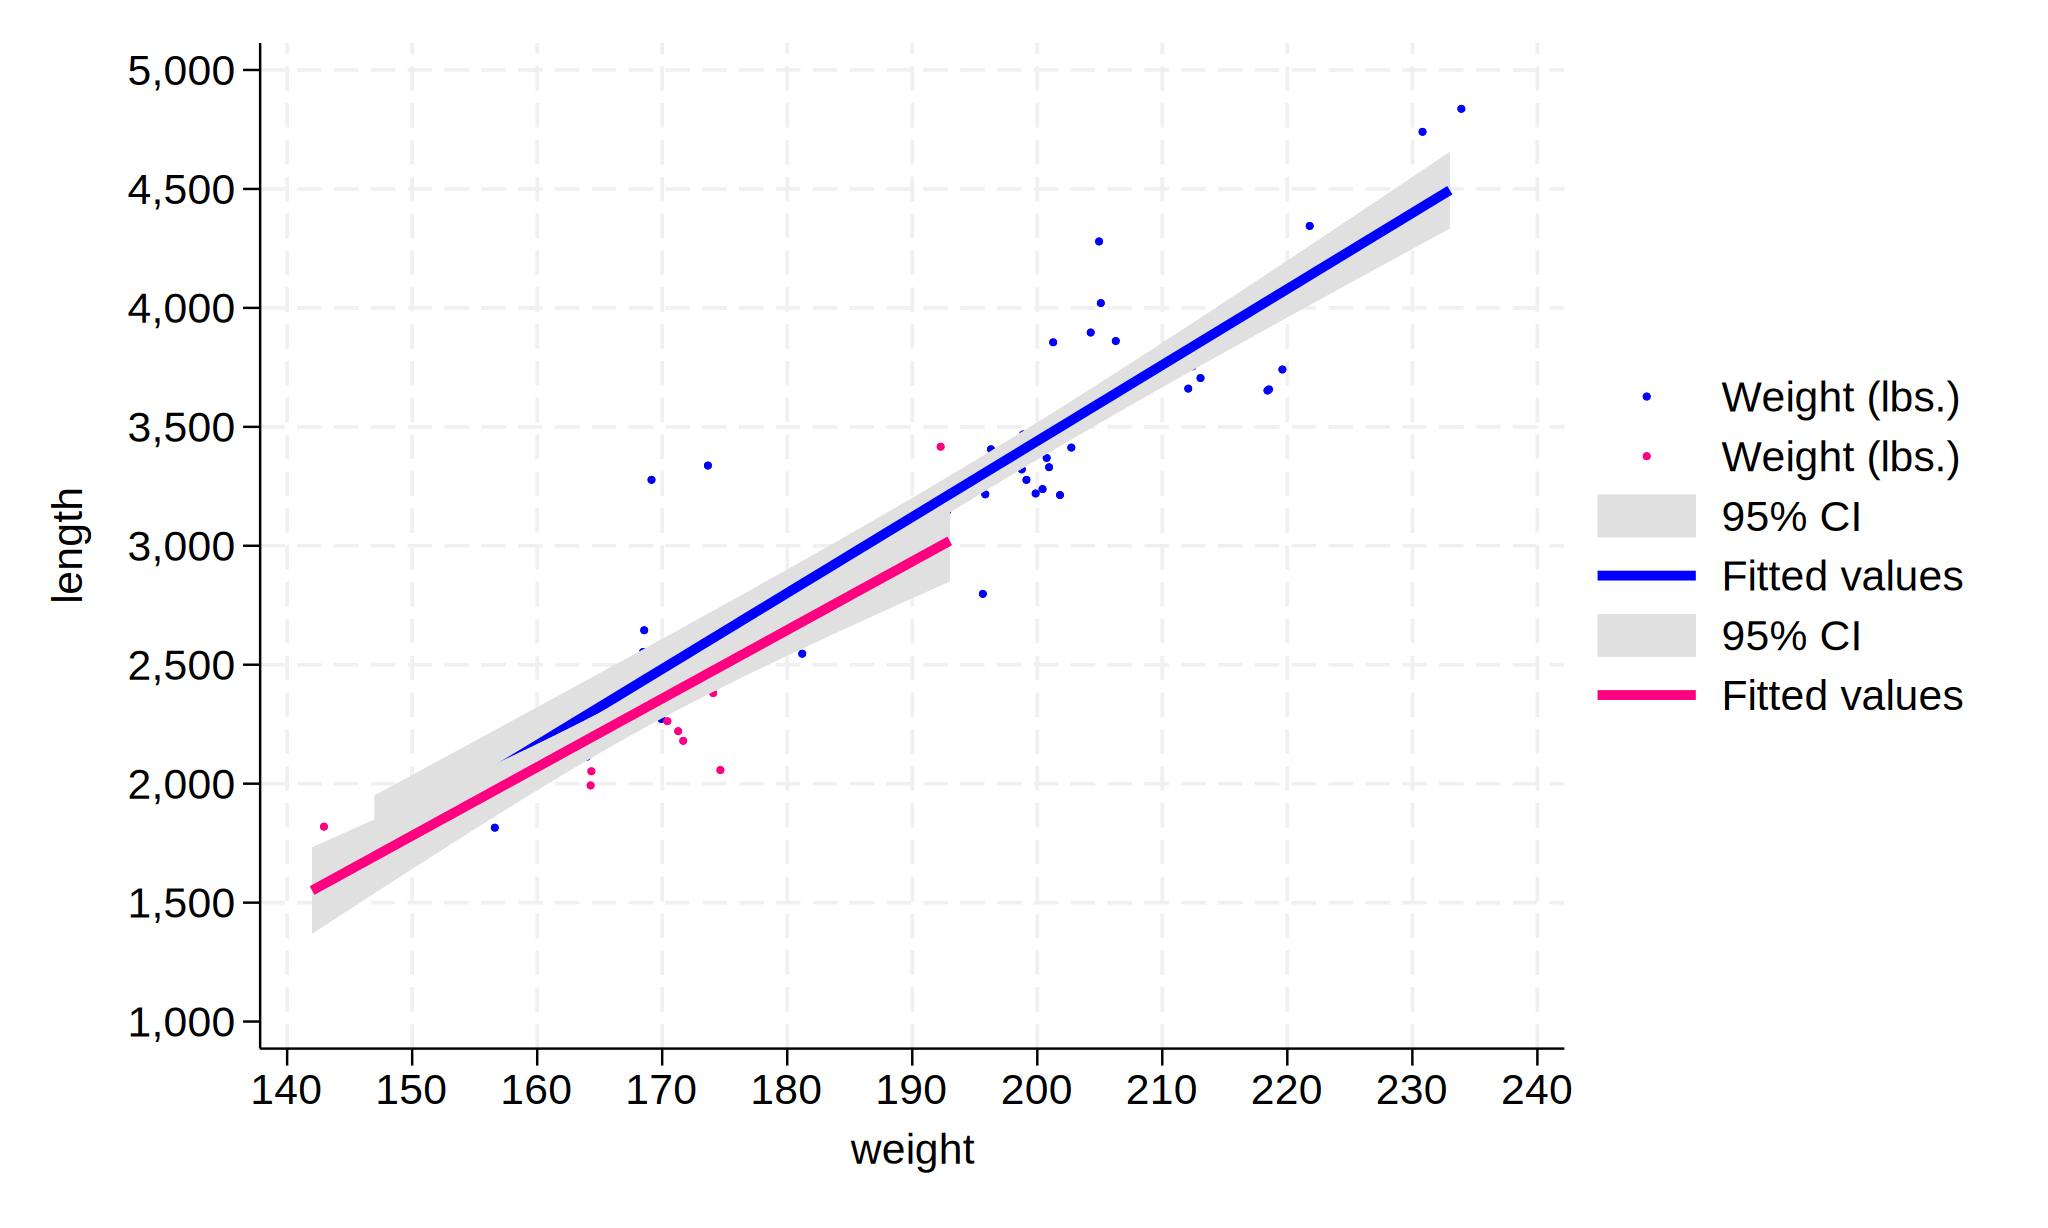

In [19]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(500)5000)

### 添加细分标记（tick）


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0)

. 


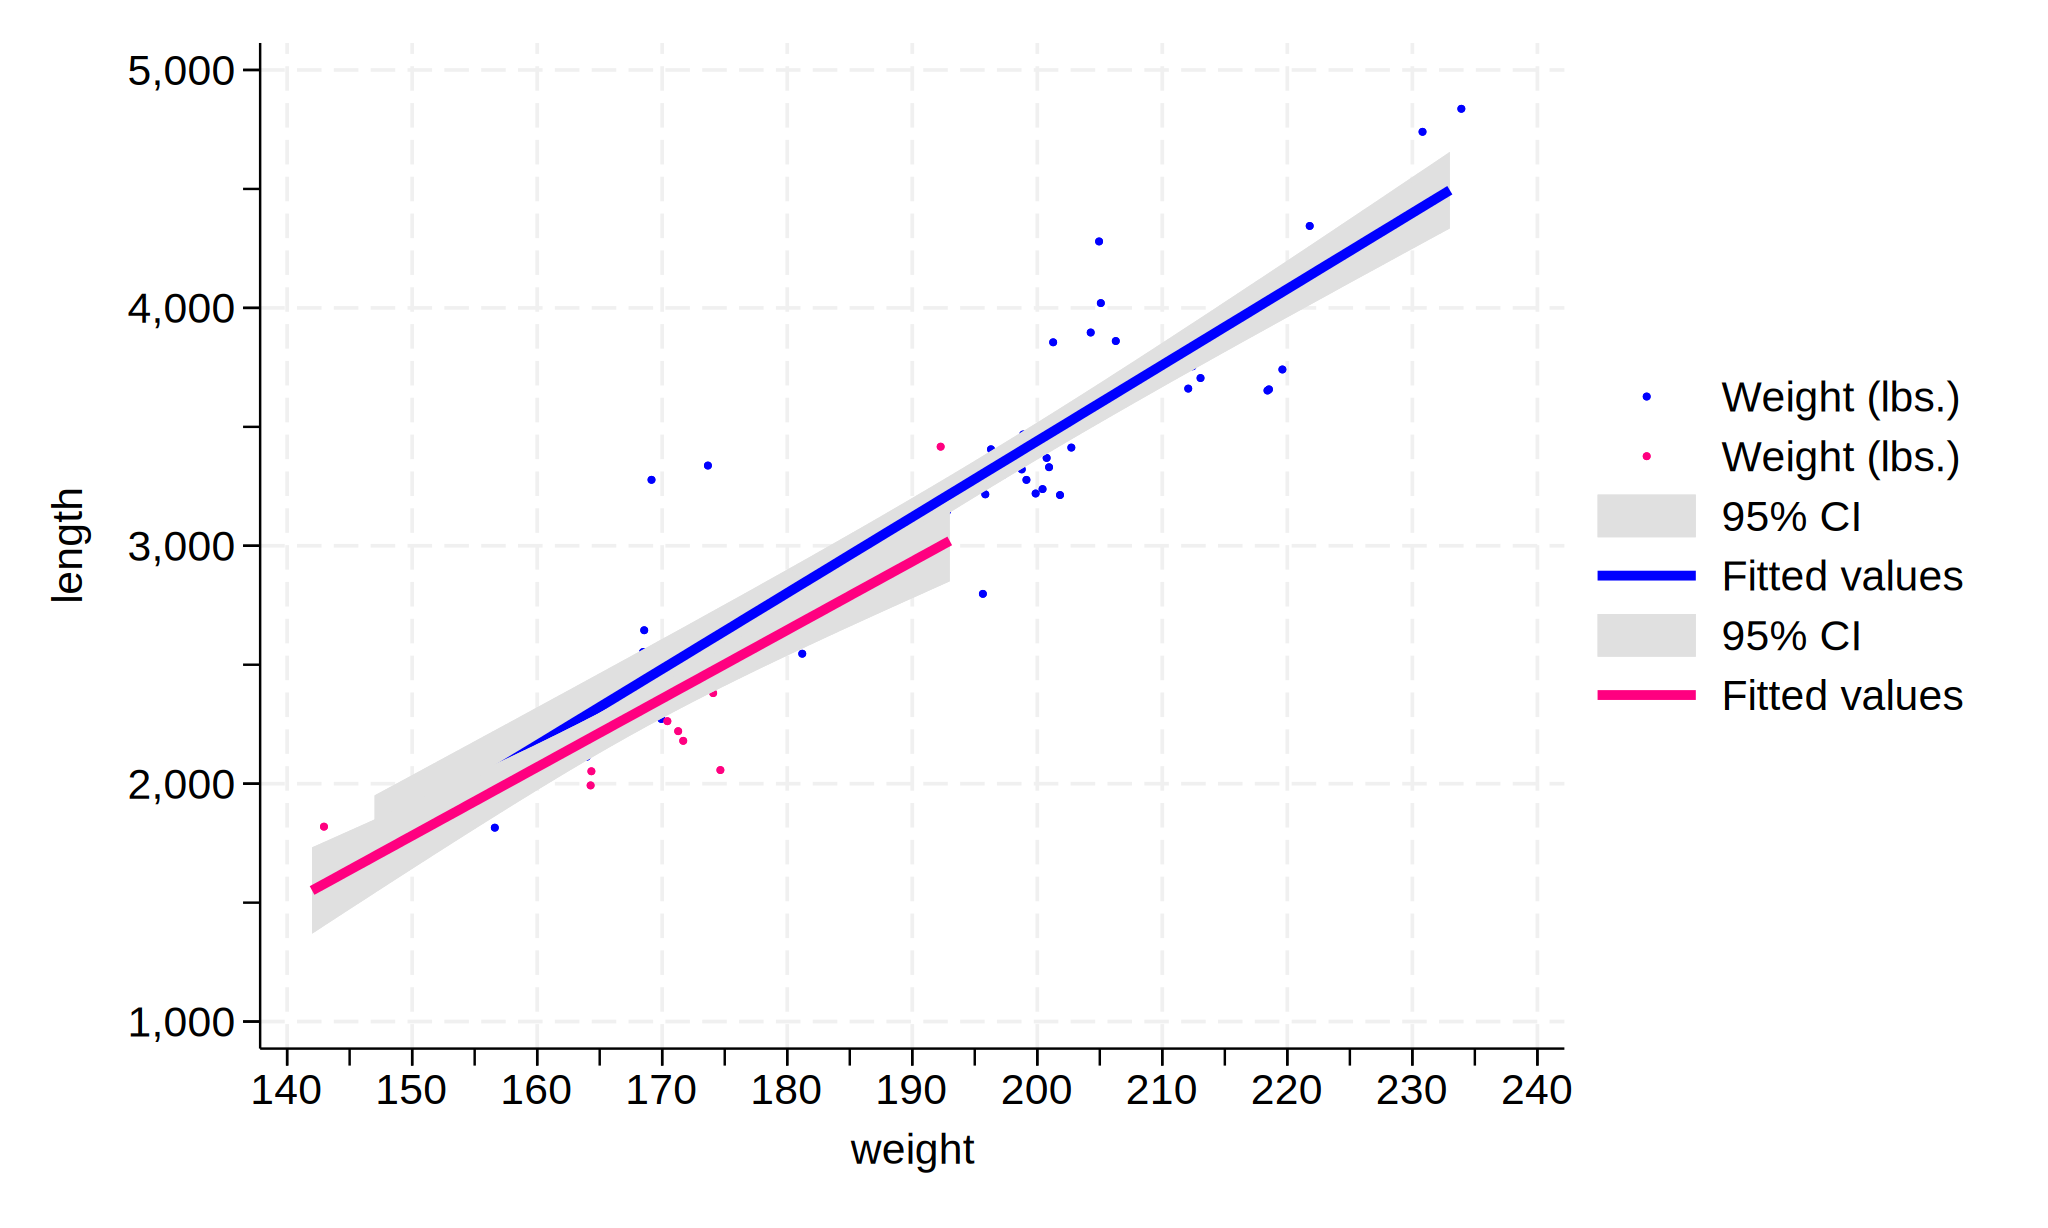

In [20]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000)

### 添加标题


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length") ///
> subtitle("by Region") ///
> caption("Data Source:1978 auto data") ///
> note("With 95% CI")

. 


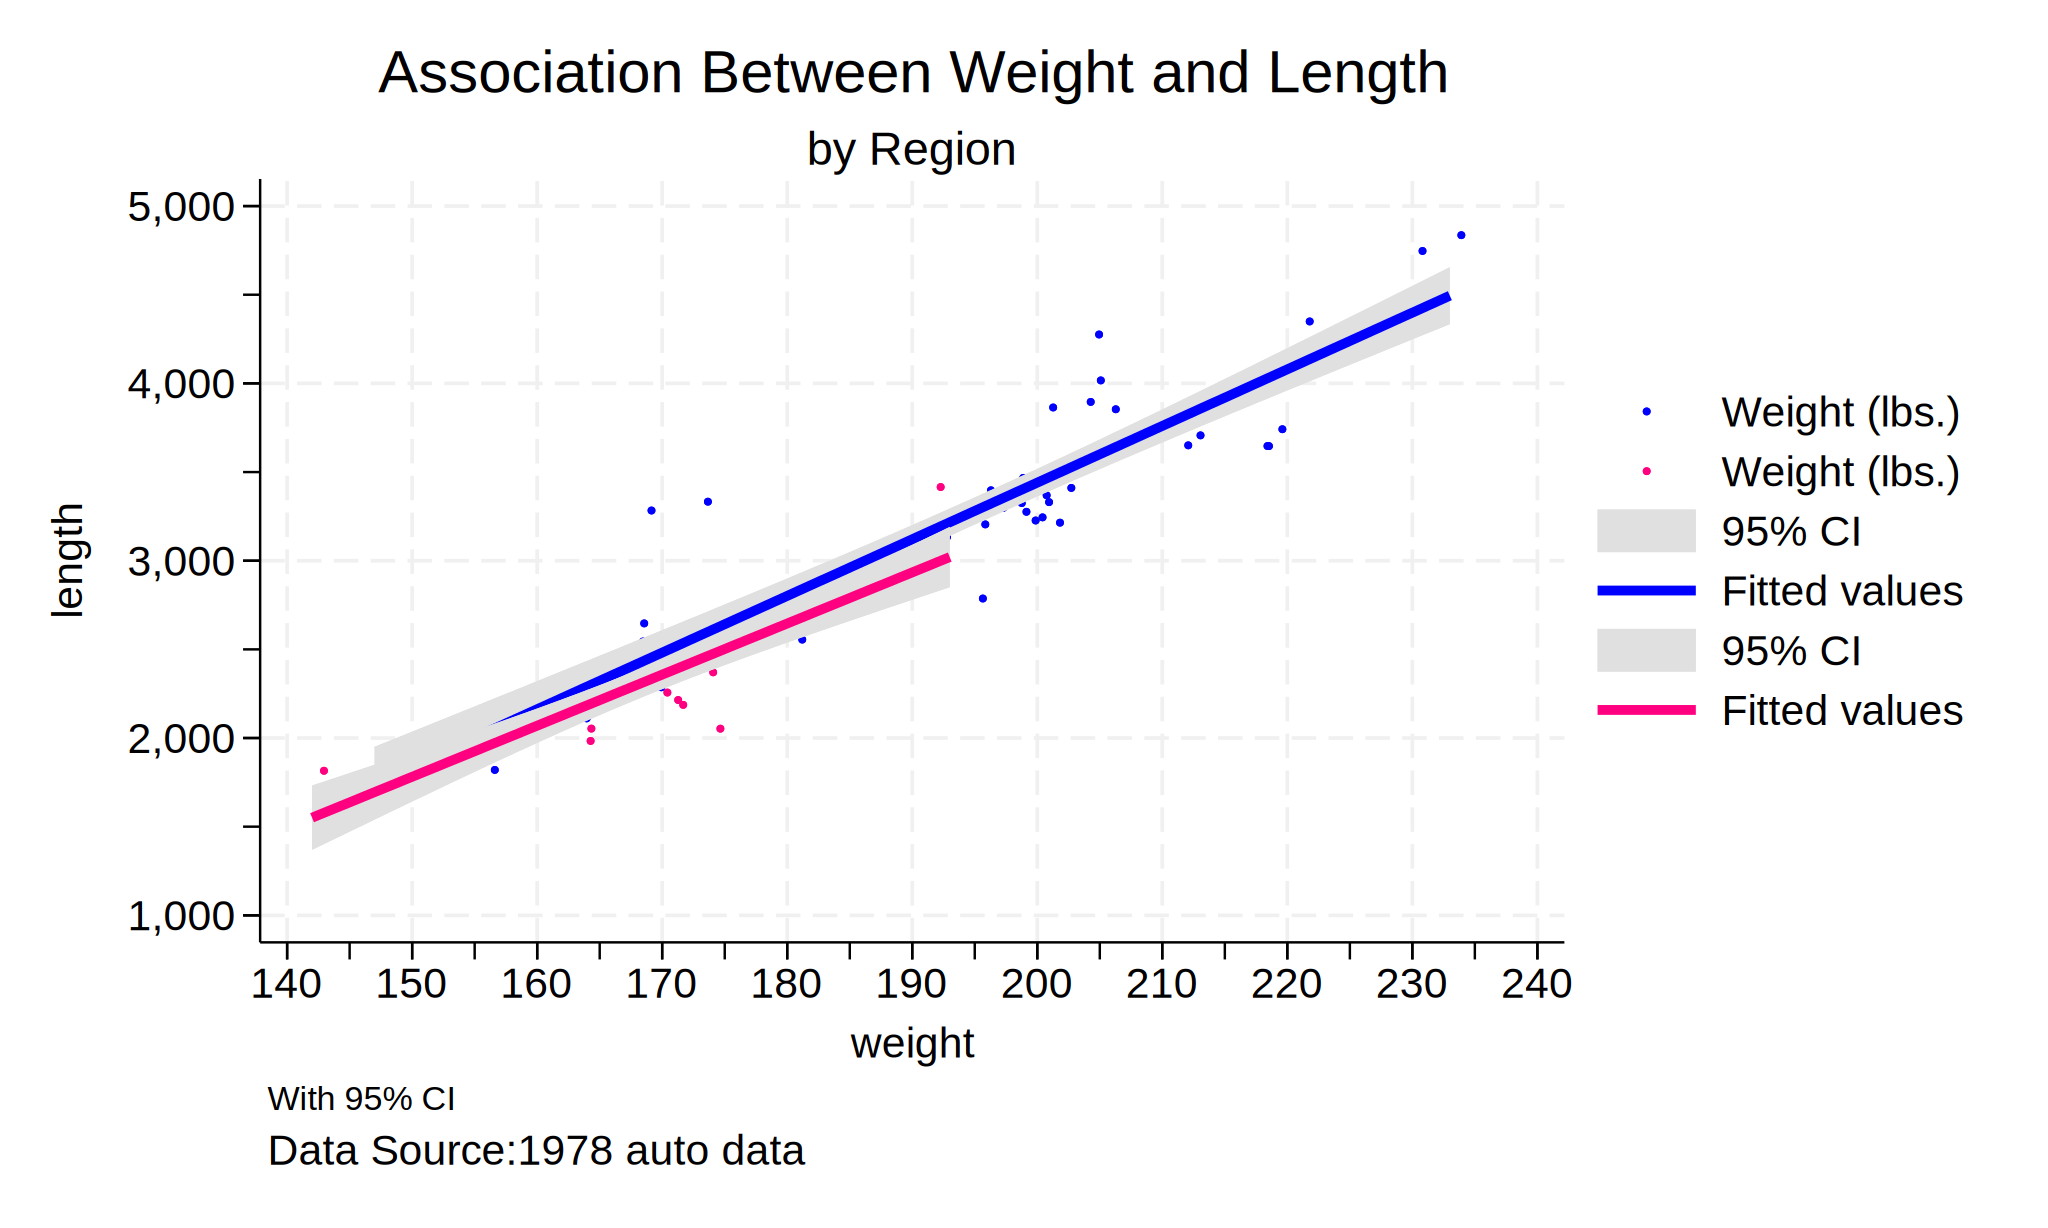

In [21]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length") ///
subtitle("by Region") ///
caption("Data Source:1978 auto data") ///
note("With 95% CI")

### 修改标签名


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length") ///
> subtitle("by Region") ///
> caption("Data Source:1978 auto data") ///
> note("With 95% CI") ///
> legend(label(1 "Domestic") label(2 "Foreign"))

. 


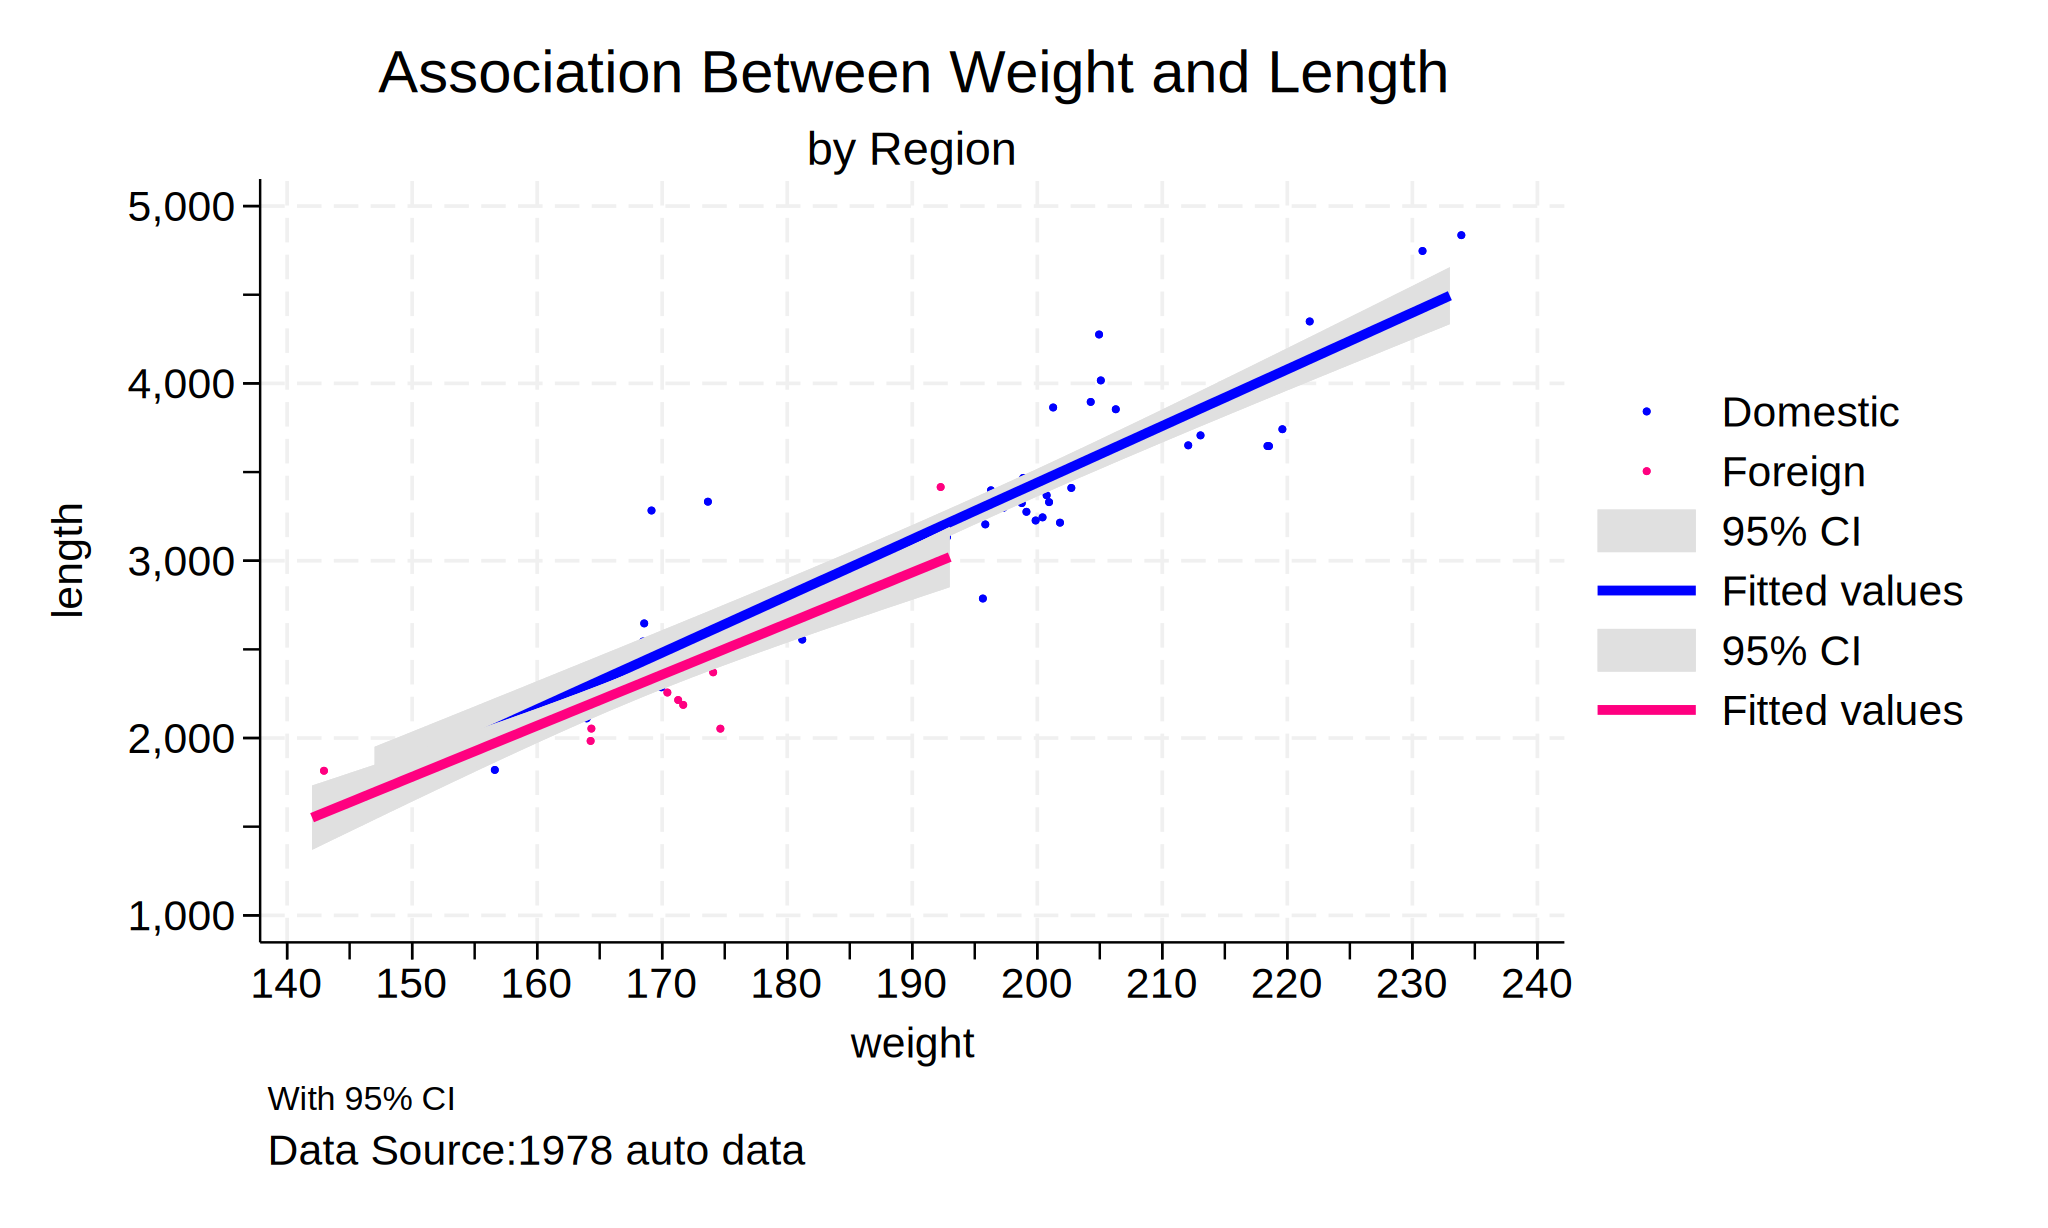

In [22]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length") ///
subtitle("by Region") ///
caption("Data Source:1978 auto data") ///
note("With 95% CI") ///
legend(label(1 "Domestic") label(2 "Foreign"))

### 移除其他标签

只保留前两个标签


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length") ///
> subtitle("by Region") ///
> caption("Data Source:1978 auto data") ///
> note("With 95% CI") ///
> legend(label(1 "Domestic") label(2 "Foreign") order(1 2)) 

. 


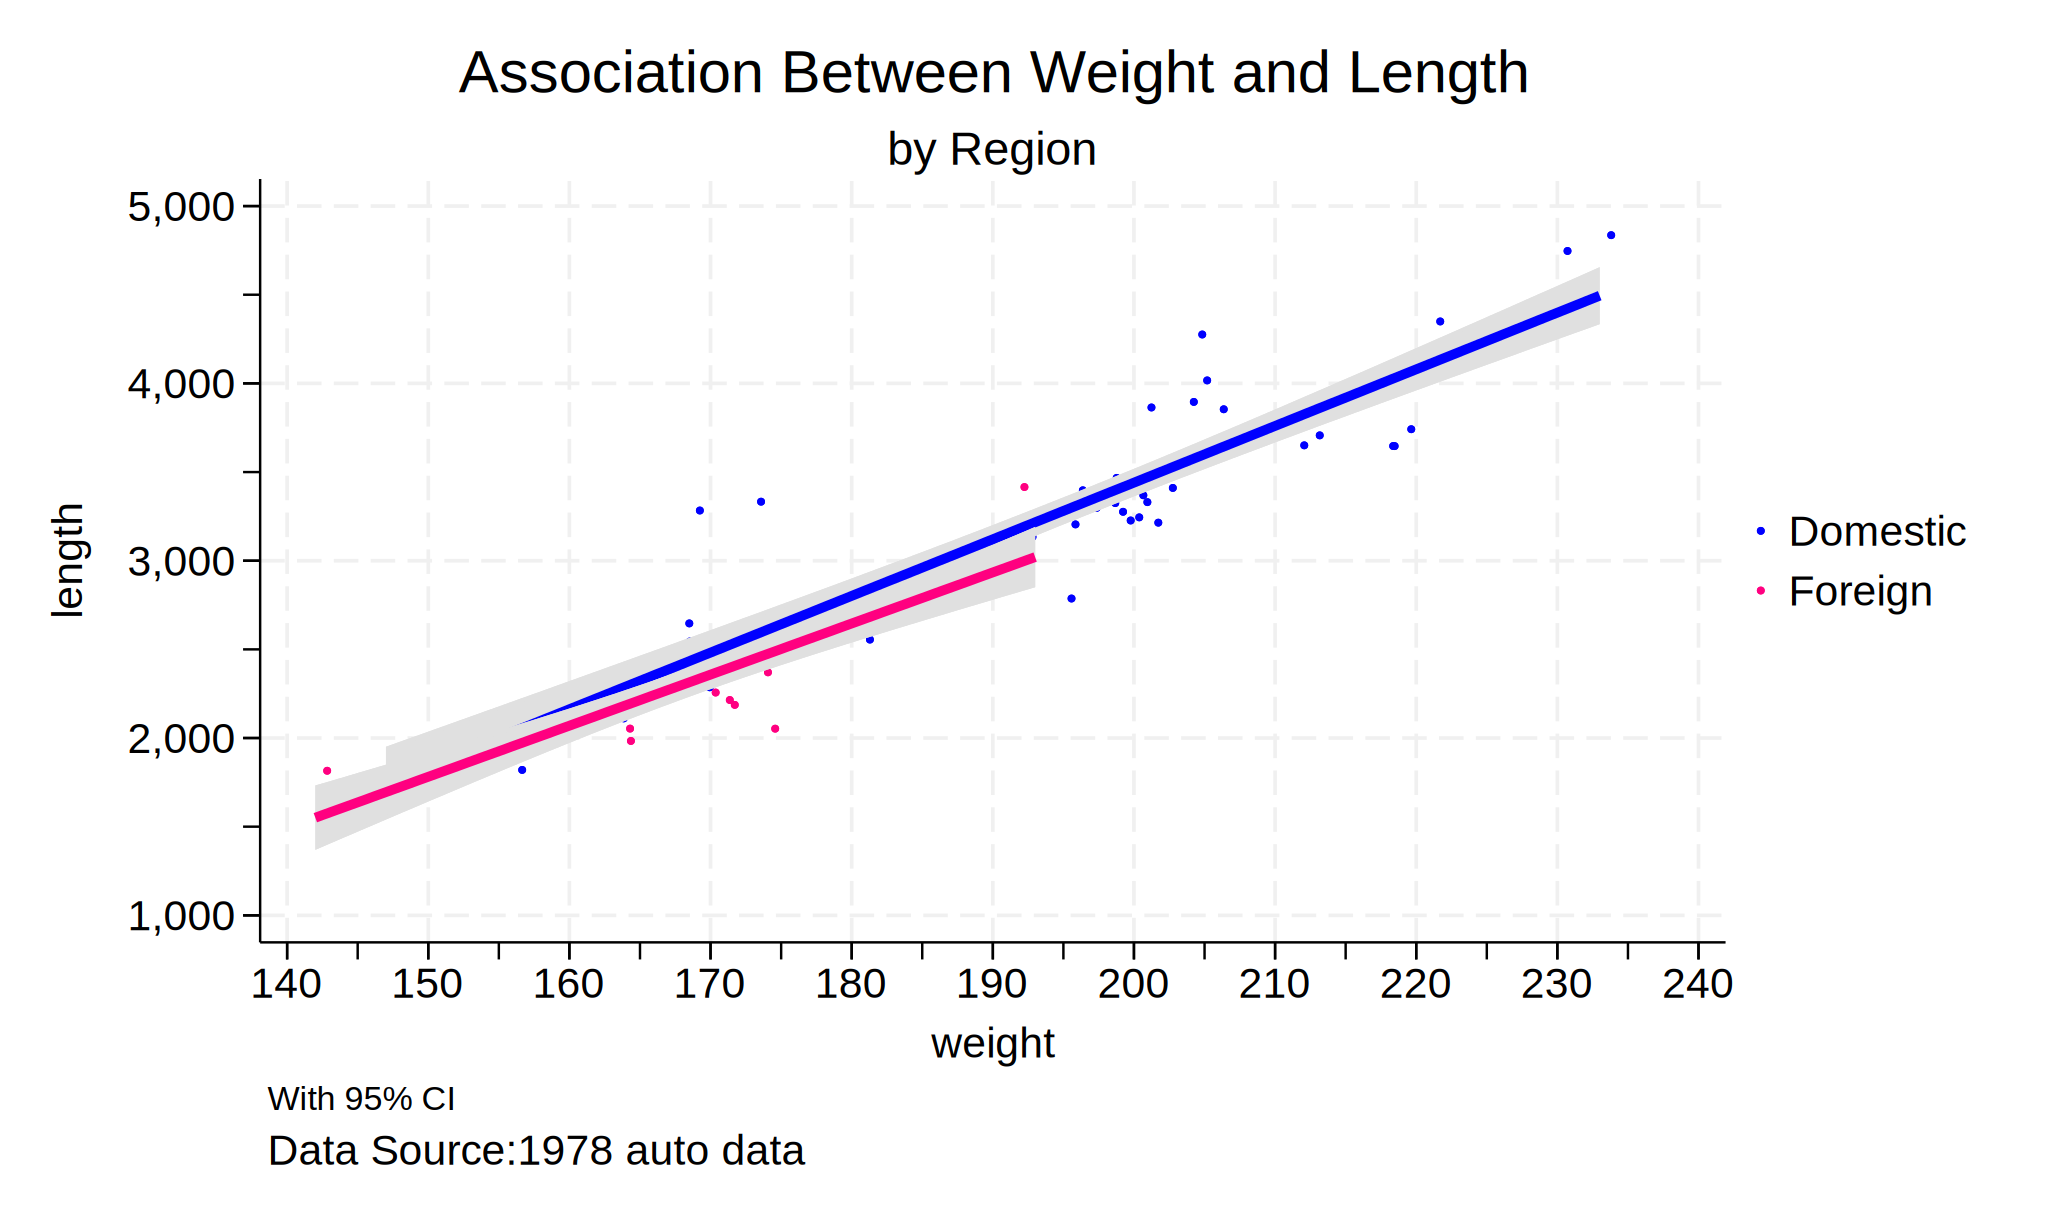

In [23]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length") ///
subtitle("by Region") ///
caption("Data Source:1978 auto data") ///
note("With 95% CI") ///
legend(label(1 "Domestic") label(2 "Foreign") order(1 2)) 

### 改变标签的位置

移入图中


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length") ///
> subtitle("by Region") ///
> caption("Data Source:1978 auto data") ///
> note("With 95% CI") ///
> legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0))

. 


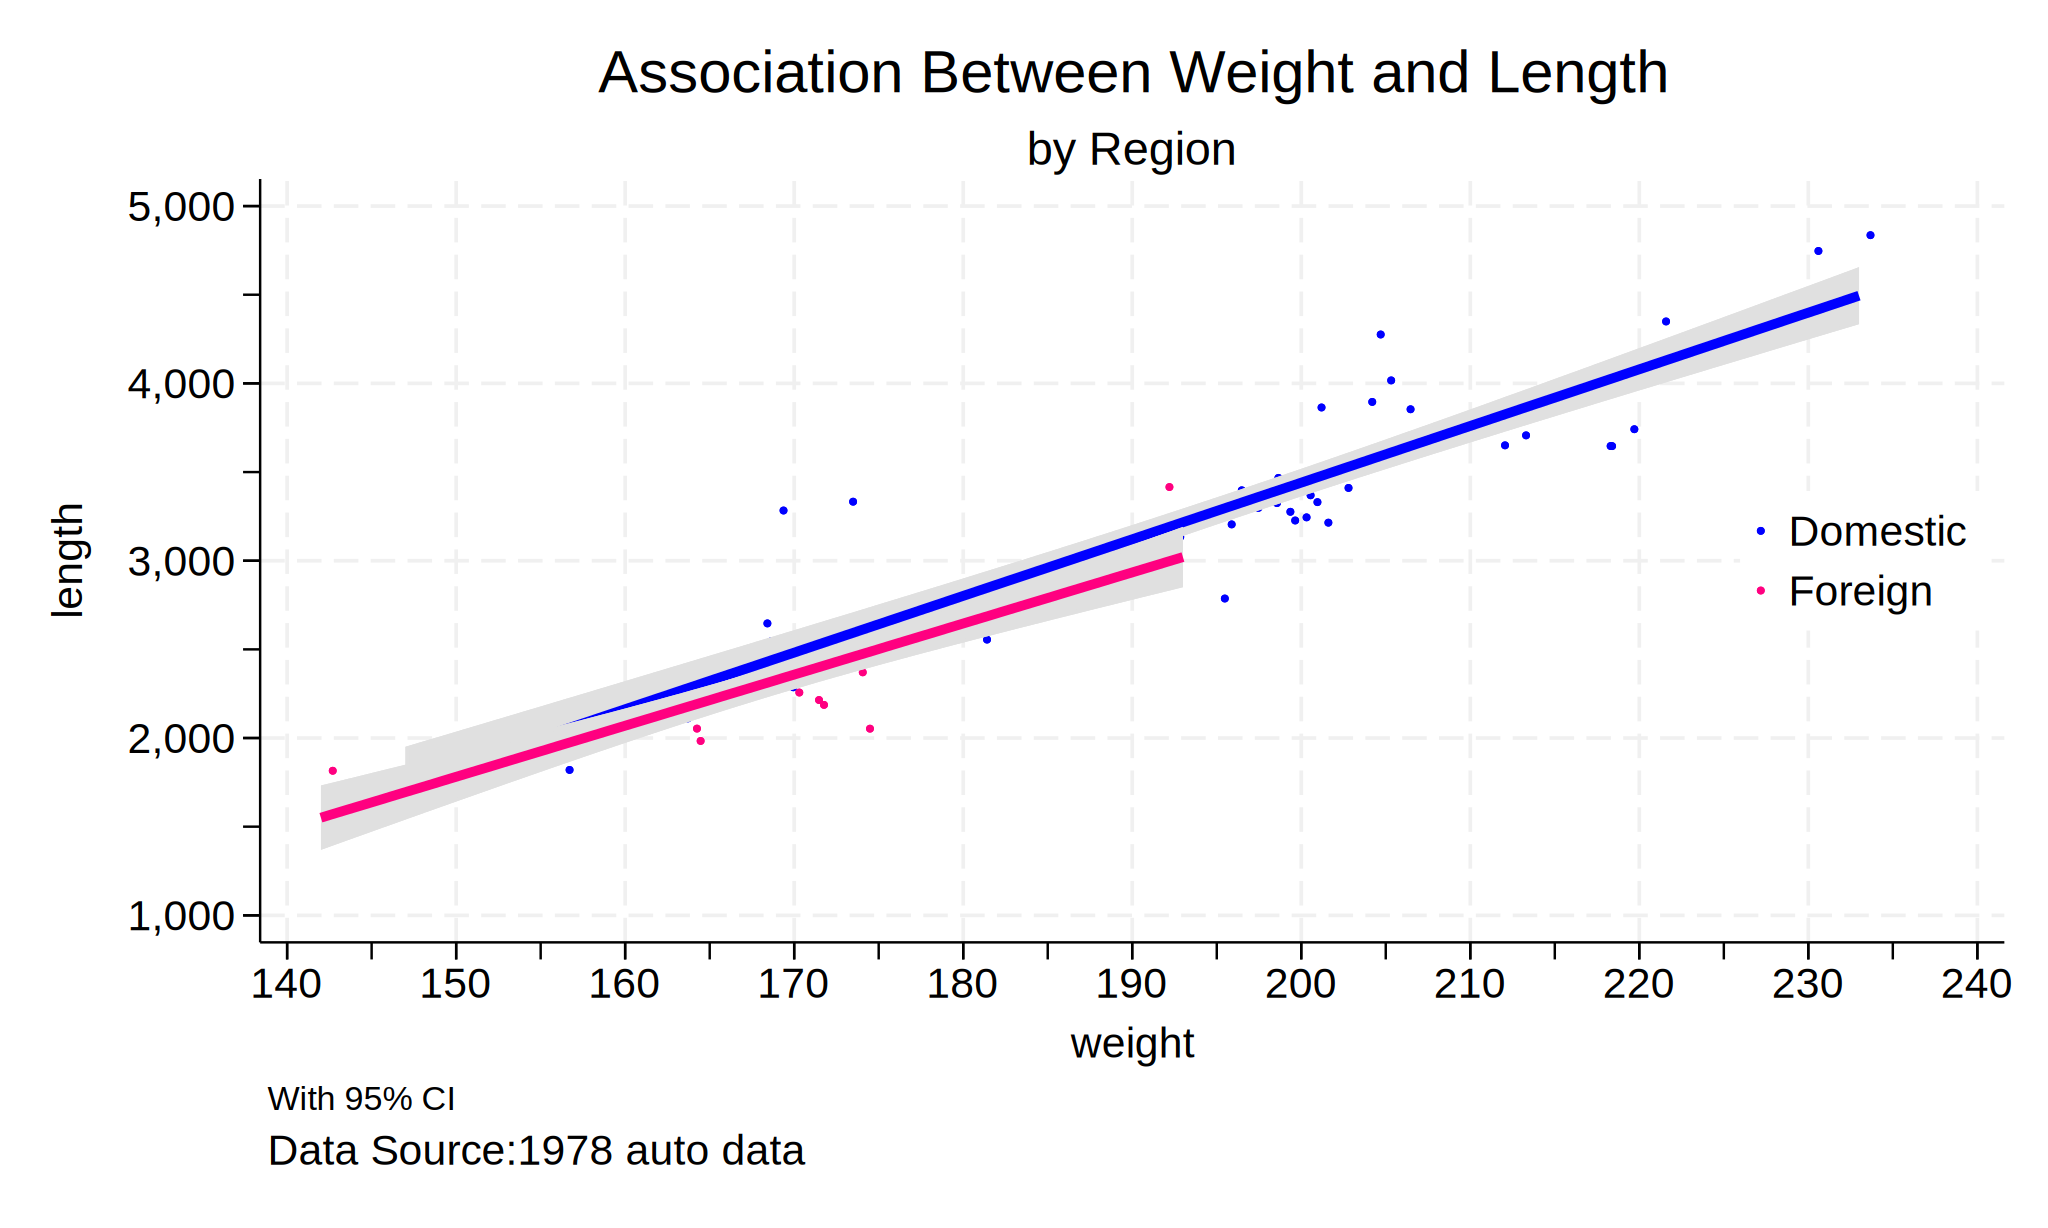

In [24]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length") ///
subtitle("by Region") ///
caption("Data Source:1978 auto data") ///
note("With 95% CI") ///
legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0))

### 指定标签位置


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length") ///
> subtitle("by Region") ///
> caption("Data Source:1978 auto data") ///
> note("With 95% CI") ///
> legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10))

. 


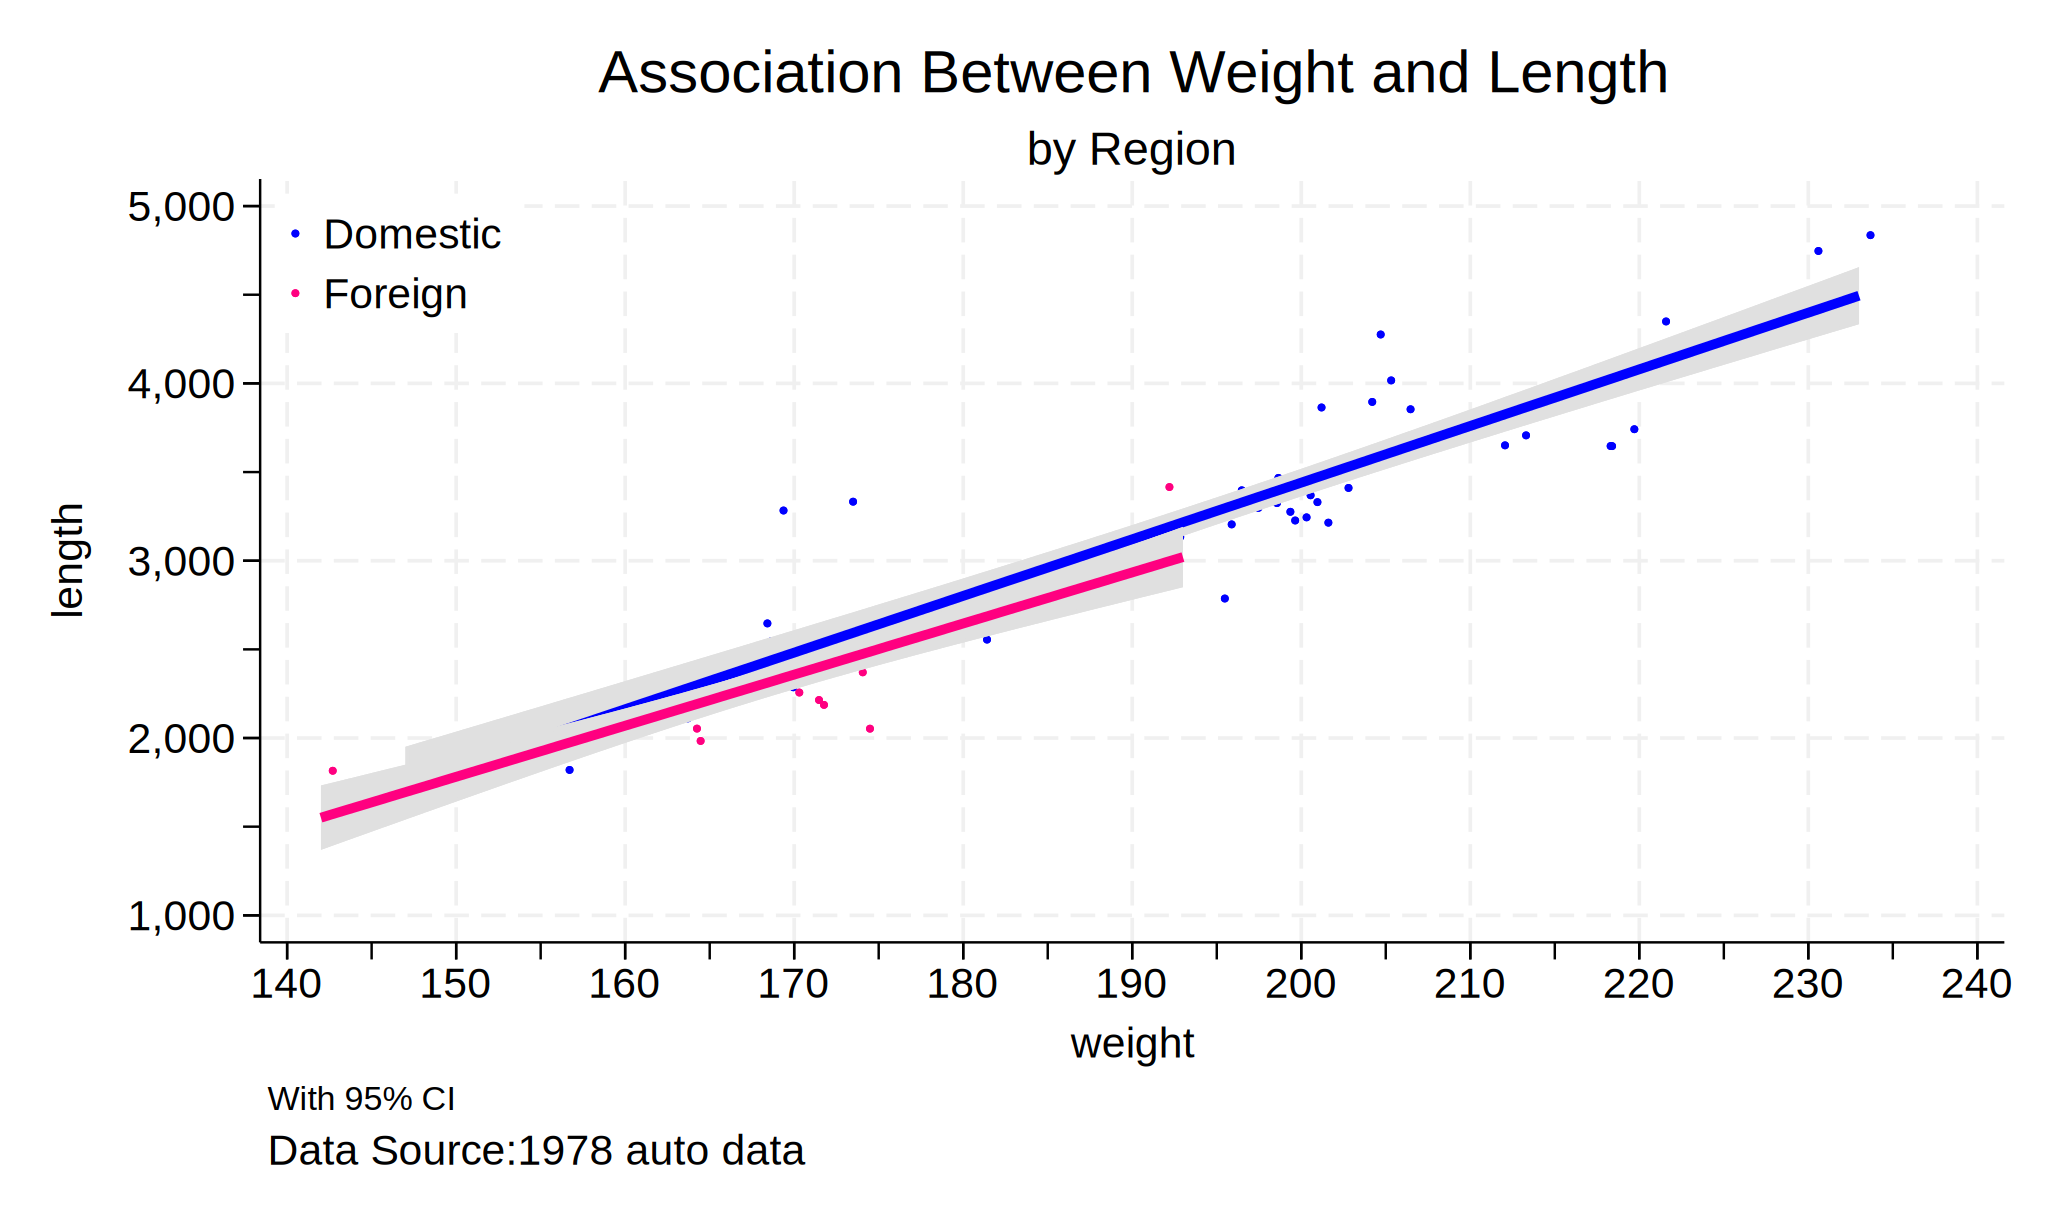

In [25]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length") ///
subtitle("by Region") ///
caption("Data Source:1978 auto data") ///
note("With 95% CI") ///
legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10))

### 修改图的边距


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length") ///
> subtitle("by Region") ///
> caption("Data Source:1978 auto data") ///
> note("With 95% CI") ///
> legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10) ///
> region(lwidth(none))) graphregion(margin(tiny))



. 


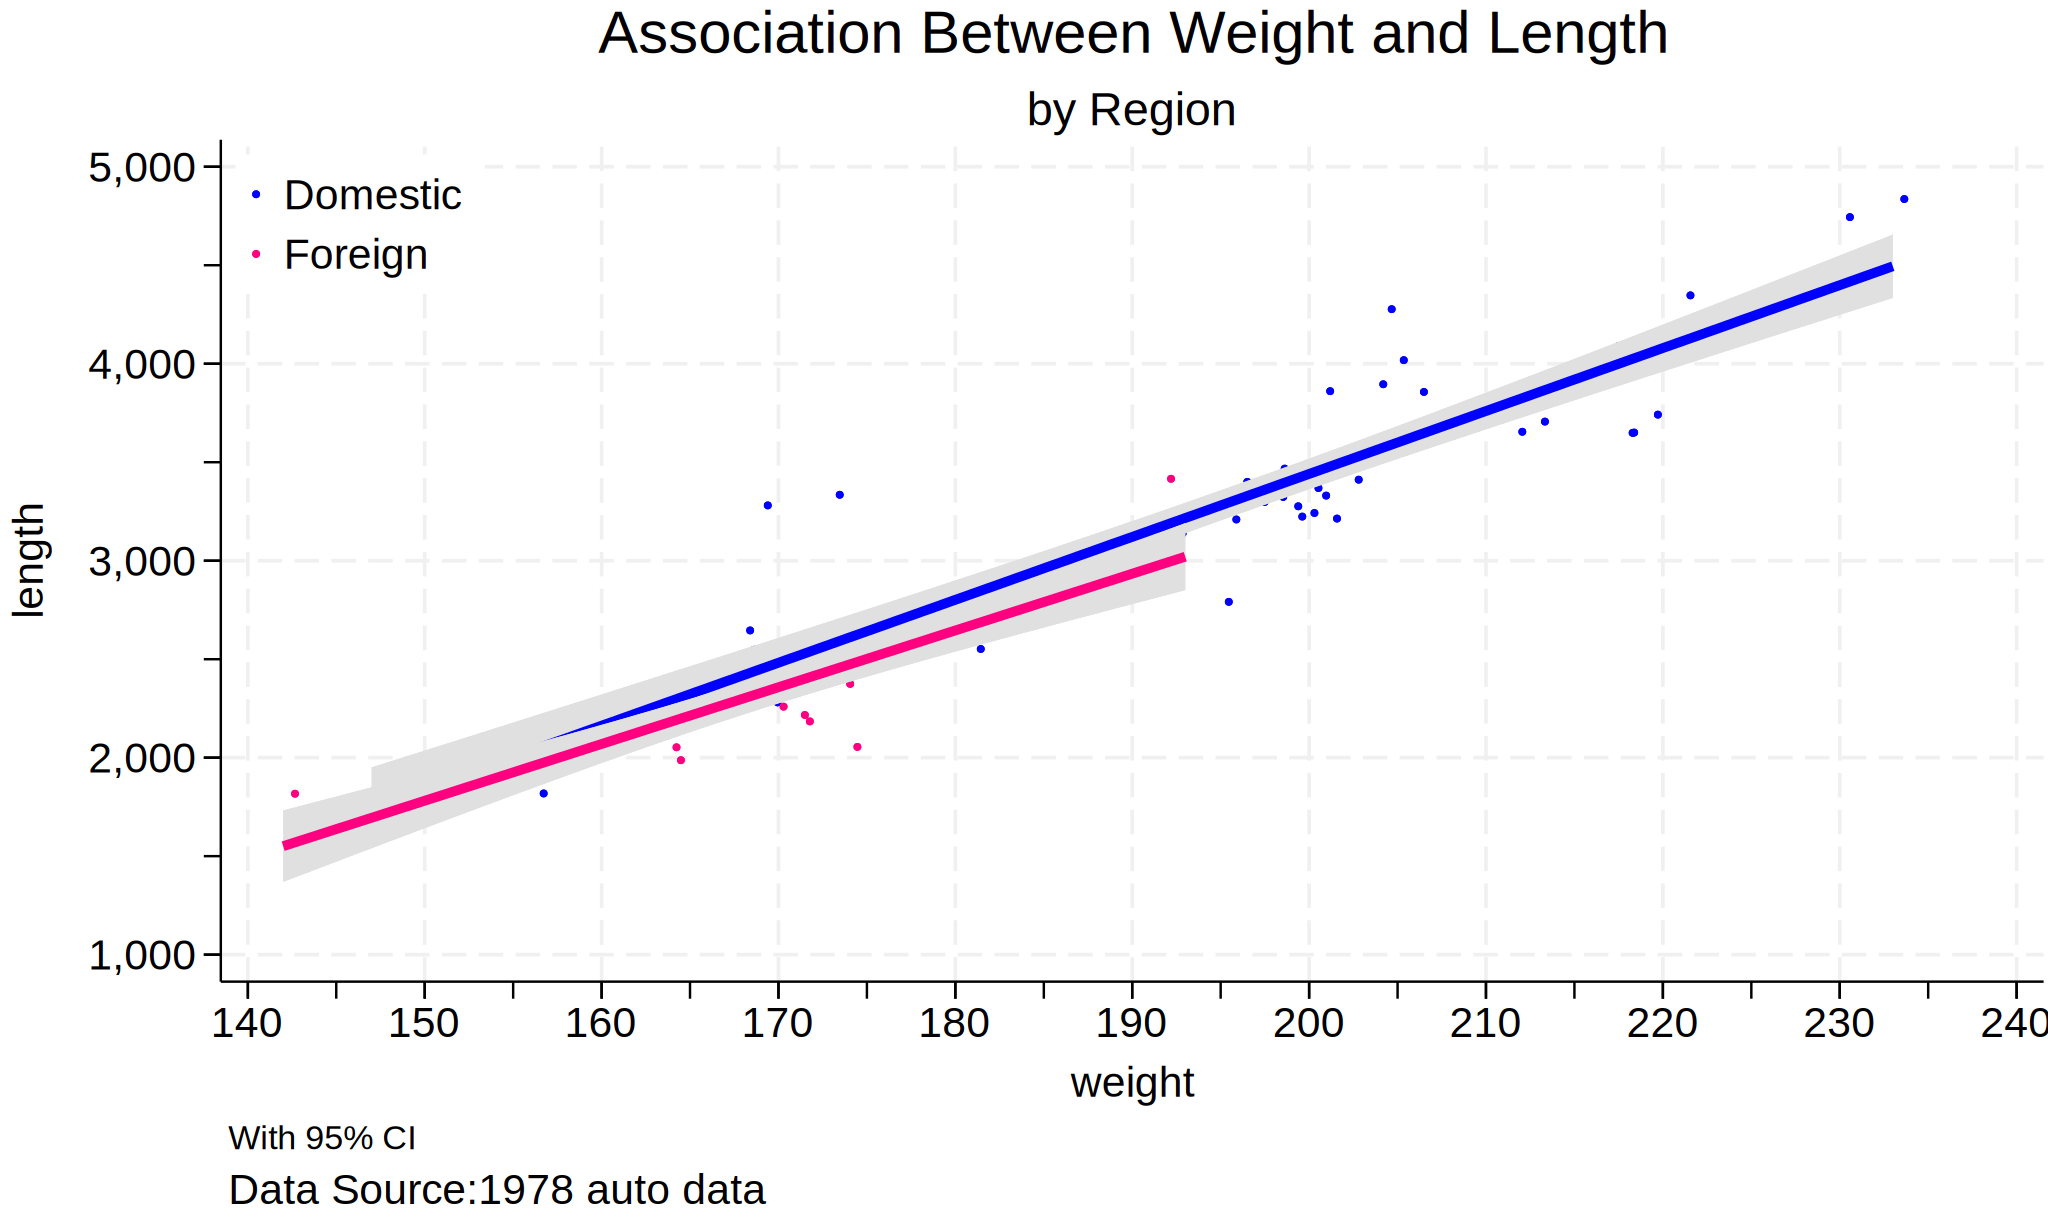

In [27]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length") ///
subtitle("by Region") ///
caption("Data Source:1978 auto data") ///
note("With 95% CI") ///
legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10) ///
region(lwidth(none))) graphregion(margin(tiny))

### 修改标题尺寸


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length", size(medianlarge)) ///
> subtitle("by Region", size(small)) ///
> caption("Data Source:1978 auto data", size(small)) ///
> note("With 95% CI", size(small)) ///
> legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10) ///
> region(lwidth(none))) graphregion(margin(tiny))
(note:  named style medianlarge not found in class gsize, default attributes
    used)

. 


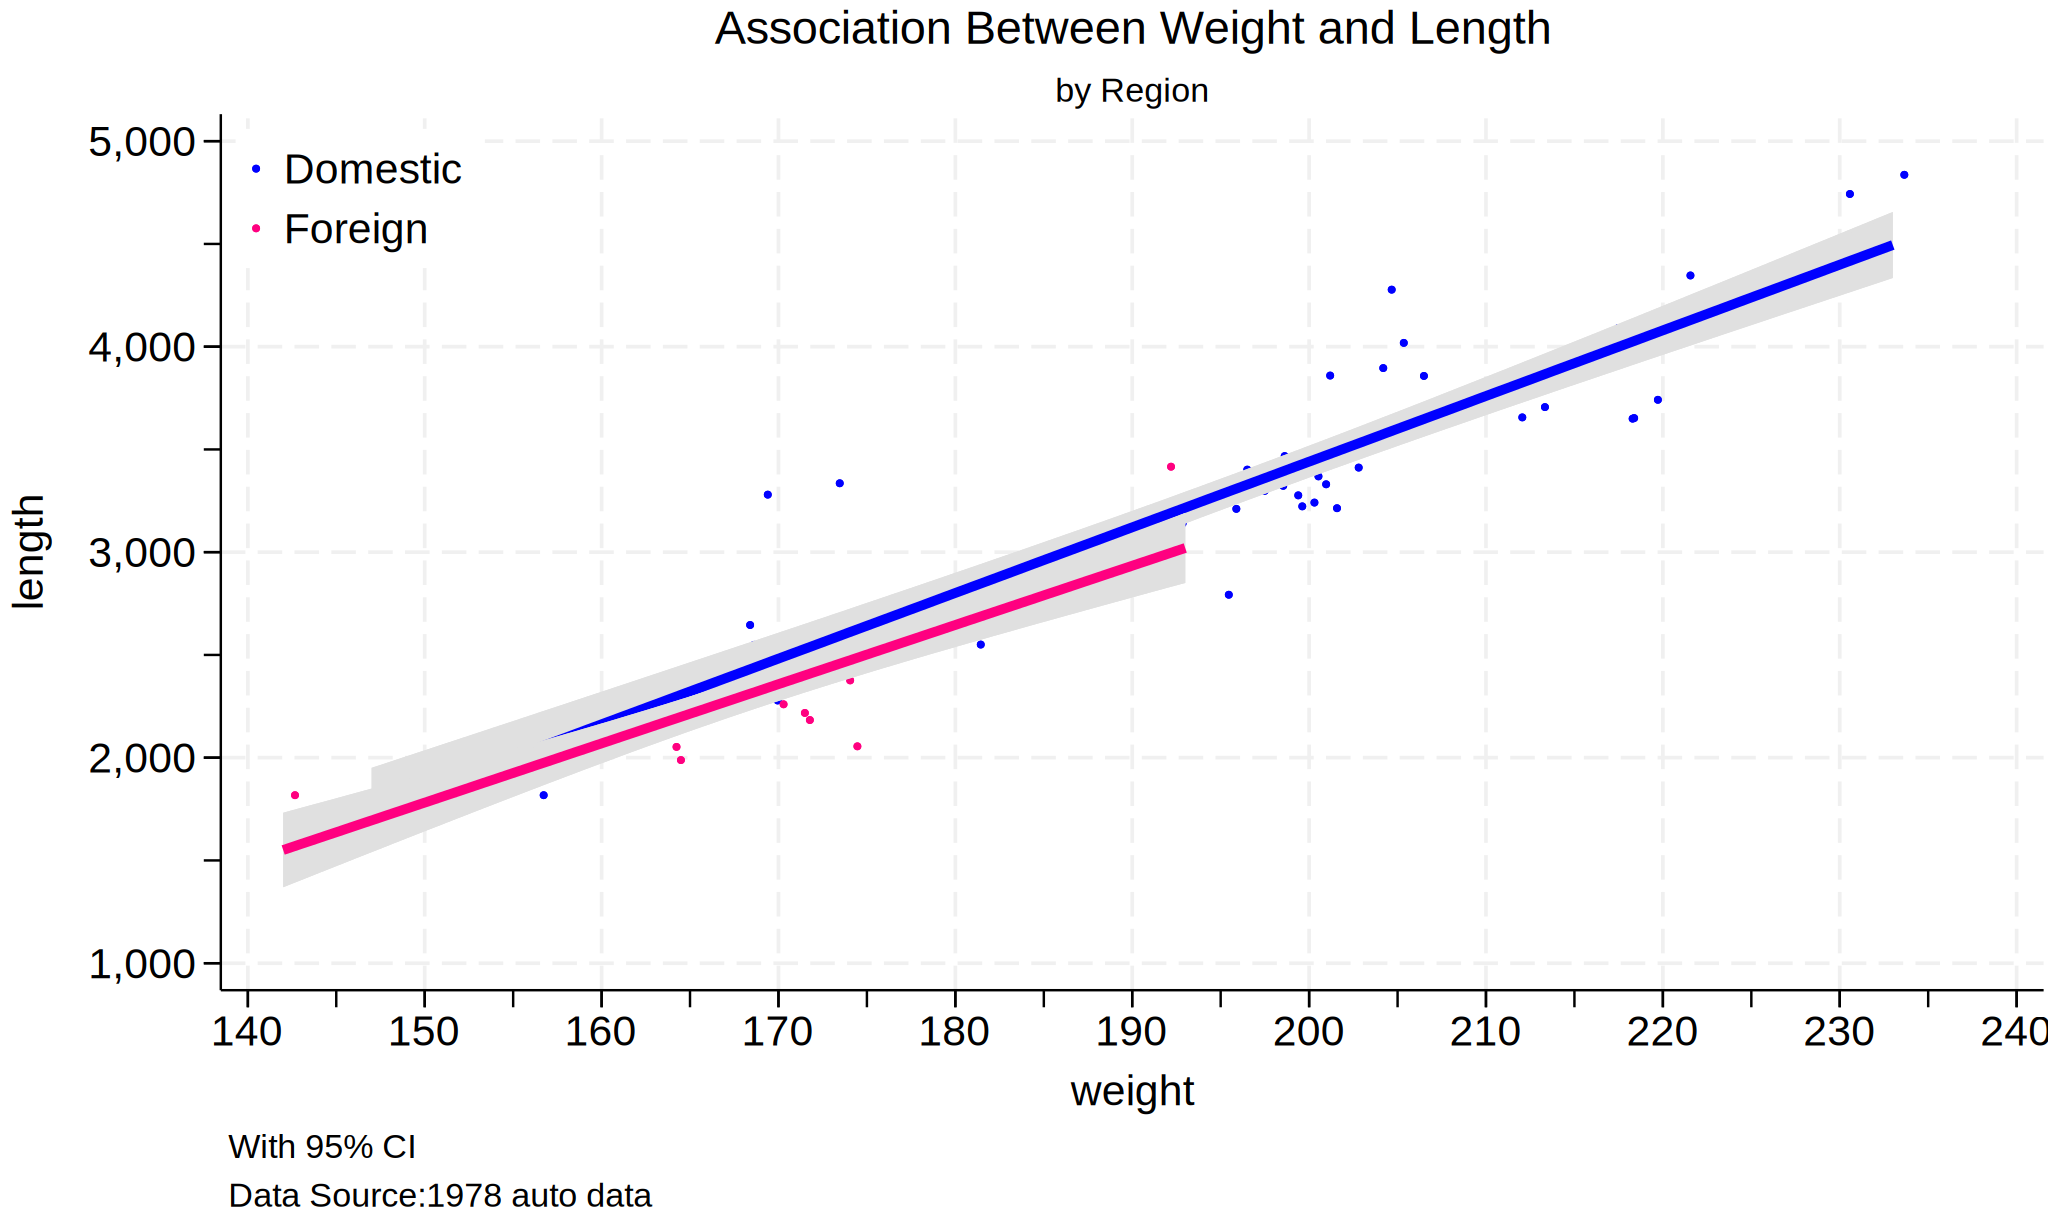

In [29]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length", size(medianlarge)) ///
subtitle("by Region", size(small)) ///
caption("Data Source:1978 auto data", size(small)) ///
note("With 95% CI", size(small)) ///
legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10) ///
region(lwidth(none))) graphregion(margin(tiny))

### 修改字体

一般杂志要求使用 Times New Roman 字体

In [33]:
%%stata
graph set window fontface "Times New Roman"

not available in non-GUI version


**Notice**：上面输出结果为： `not available in non-GUI version`

这是因为：当前使用的是 Stata 的非图形界面（non-GUI）版本，比如在 Stata MP batch mode、Stata in terminal (Unix/Linux)、或通过 Jupyter Notebook、Python pystata接口 调用的 Stata 环境。这些环境中不支持 `graph set window` 命令，因为这个命令是为了设置 GUI 图形窗口的字体，而非图形文件的输出。

因此需要更改方式指定字体形式，GPT 给出如下修改建议

1. 导出图像文件时使用 Times New Roman 字体：`graph export mygraph.tif, fontface("Times New Roman") width(800) replace`
2. 在绘图时直接指定字体：`twoway (scatter y x), title("My Title", fontface("Times New Roman"))`

但是上述解决方案均无法运行，无法正确生成对应的图像，因此此处跳过设置字体

## 导出图像

可选择的导出格式很多，请根据实际需要进行选择，并且可以调整像素大小，一般来说 2400 足够满足大多数期刊需求

导出命令必须紧接在绘图命令之后，不然会报错


. twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue
> )) ///
> (scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
> (lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
> (lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
> xtitle("weight") ytitle("length") ///
> xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)500
> 0) ///
> title("Association Between Weight and Length", size(medianlarge)) ///
> subtitle("by Region", size(small)) ///
> caption("Data Source:1978 auto data", size(small)) ///
> note("With 95% CI", size(small)) ///
> legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10) ///
> region(lwidth(none))) graphregion(margin(tiny))


(note:  named style medianlarge not found in class gsize, default attributes
    used)

. 
. * change the pixel and specify the format
. graph export "Graph_test.svg", width(2400) replace
(file Graph_test.svg not found)
file Graph_test.svg saved as SVG format

. 


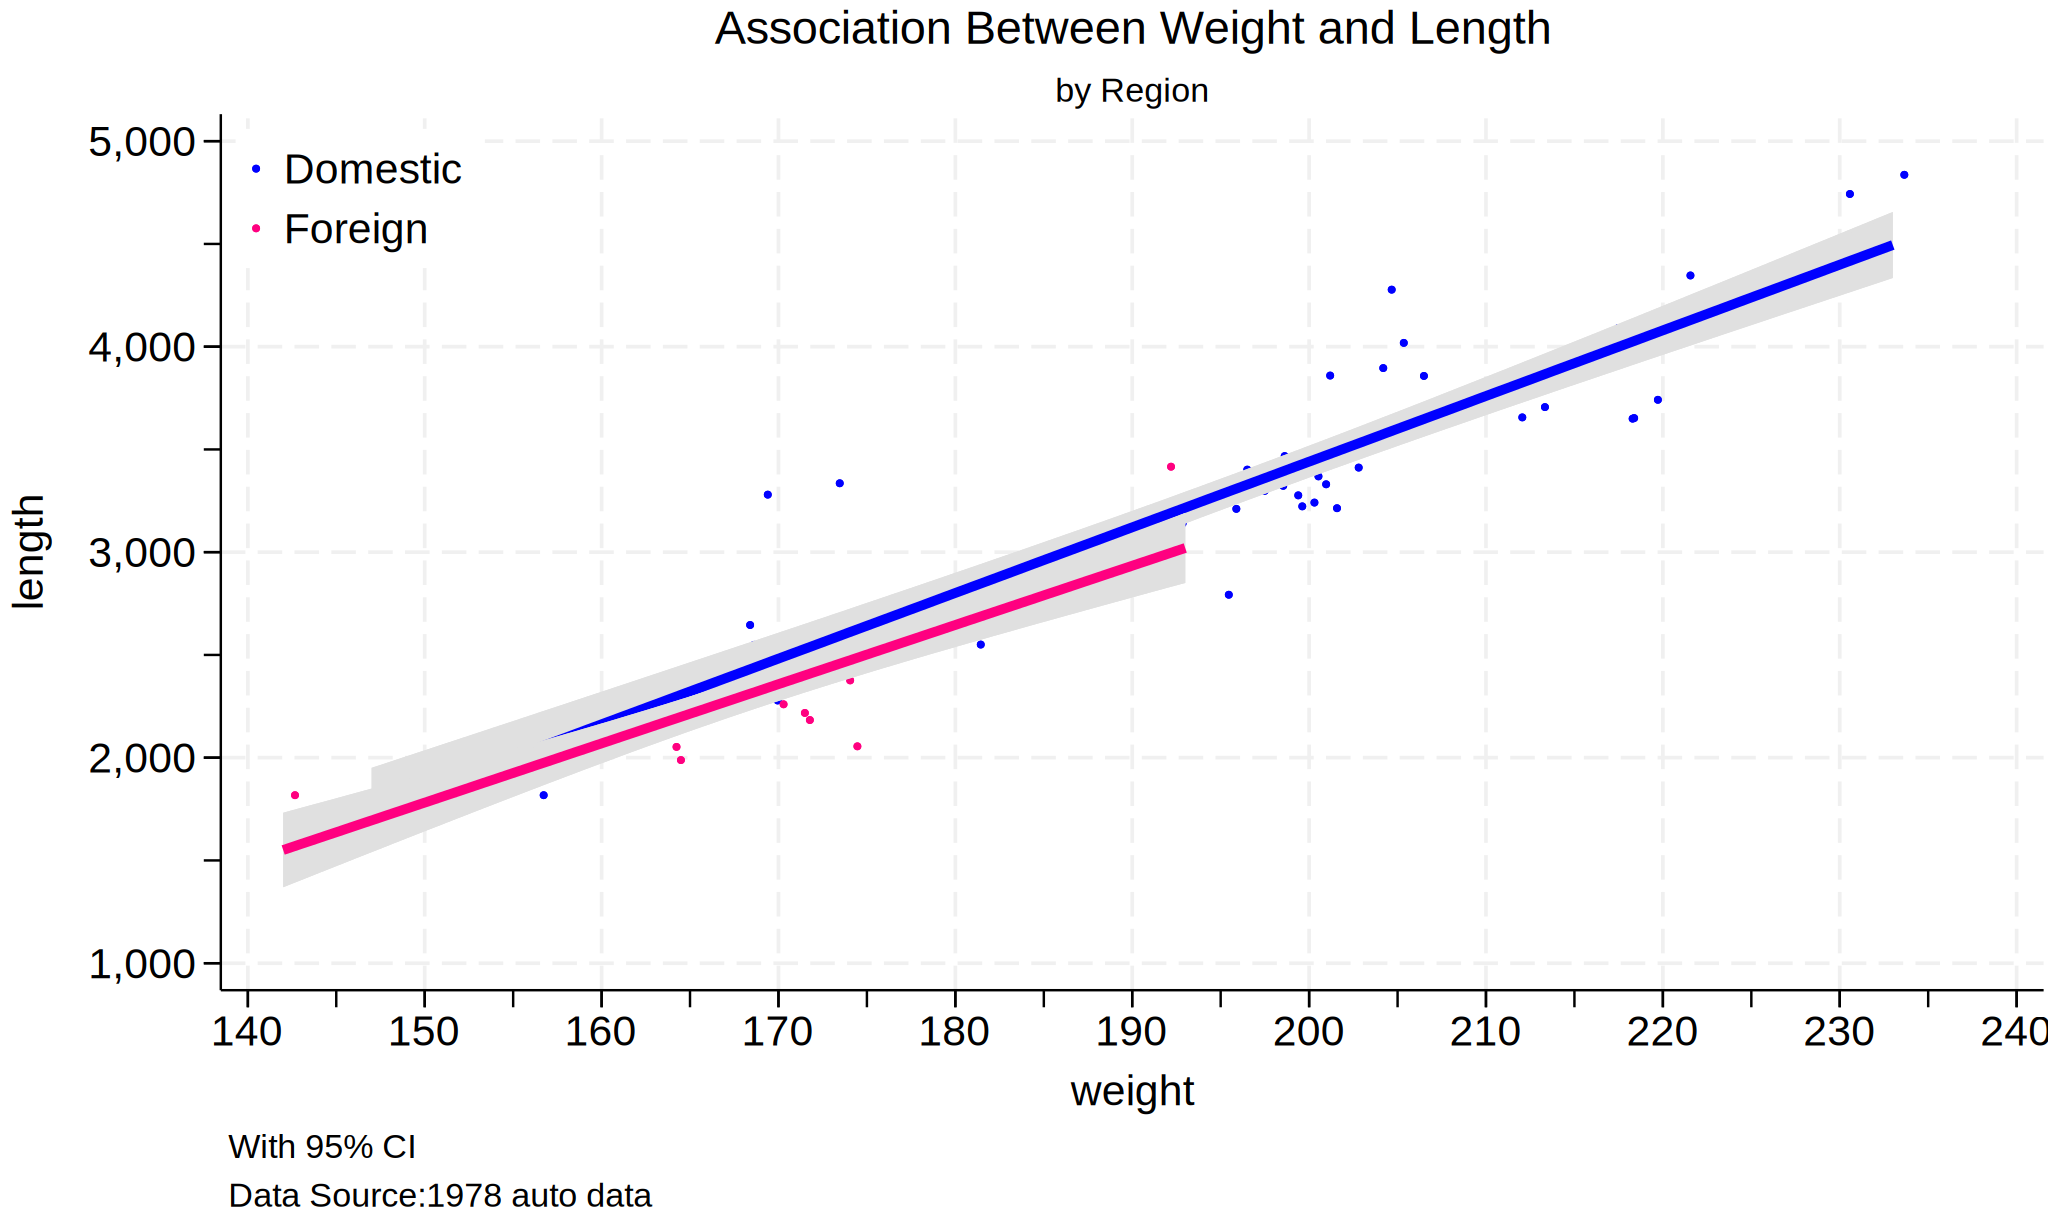

In [38]:
%%stata
twoway(scatter weight length if foreign ==0,jitter(2) msize(tiny) mcolor(blue)) ///
(scatter weight length if foreign ==1,jitter(2) msize(tiny) mcolor(pink)) ///
(lfitci weight length if foreign ==0,clcolor(blue) clwidth(thick)) ///
(lfitci weight length if foreign ==1,clcolor(pink) clwidth(thick)), ///
xtitle("weight") ytitle("length") ///
xlabel(140(10)240) ylabel(1000(1000)5000) xtick(140(5)240) ytick(1000(500)5000) ///
title("Association Between Weight and Length", size(medianlarge)) ///
subtitle("by Region", size(small)) ///
caption("Data Source:1978 auto data", size(small)) ///
note("With 95% CI", size(small)) ///
legend(label(1 "Domestic") label(2 "Foreign") order(1 2) ring(0) pos(10) ///
region(lwidth(none))) graphregion(margin(tiny))

* change the pixel and specify the format
graph export "Graph_test.svg", width(2400) replace